# 程序说明
时间：2016年11月17日

说明：该程序构造一个变分自动编码器。

Reference: ["Auto-Encoding Variational Bayes"](https://arxiv.org/abs/1312.6114)

数据集：MNIST

## 1.加载keras模块

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Input, Dense, Lambda, Add, concatenate
from keras.models import Model
from keras import backend as K
from keras import objectives
#from keras.datasets import mnist
import sum_input

Using TensorFlow backend.


## 2.变量初始化

In [2]:
batch_size = 100
original_dim = 784
latent_dim = 2
intermediate_dim = 256
nb_epoch = 50
epsilon_std = 1.0

x = Input(batch_shape=(batch_size, original_dim),name='x_input')
h = Dense(intermediate_dim, activation='relu',name='Dense_1')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

x2 = Input(batch_shape=(batch_size, original_dim),name='x2_input')
h2 = Dense(intermediate_dim, activation='relu',name='Dense_2')(x2)
z_mean2 = Dense(latent_dim)(h2)
z_log_var2 = Dense(latent_dim)(h2)

x_sum = Input(batch_shape=(batch_size, original_dim),name='sum_input')

In [3]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.,
                              stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [4]:
# note that "output_shape" isn't necessary with the TensorFlow backend
#z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])
z = Lambda(sampling)([z_mean, z_log_var])
z2 = Lambda(sampling)([z_mean2, z_log_var2])

In [5]:
# we instantiate these layers separately so as to reuse them later
decoder_h = Dense(intermediate_dim, activation='relu',name='Dense_3')
decoder_mean = Dense(original_dim, activation='sigmoid',name='Dense_4')
h_decoded = decoder_h(z) #####
x_decoded_mean = decoder_mean(h_decoded)

decoder_h2 = Dense(intermediate_dim, activation='relu',name='Dense_5')
decoder_mean2 = Dense(original_dim, activation='sigmoid',name='Dense_6')
h_decoded2 = decoder_h(z2) #####
x_decoded_mean2 = decoder_mean(h_decoded2)

decoder_h_sum = Dense(intermediate_dim, activation='relu',name='Dense_7')
decoder_mean_sum = Dense(original_dim, activation='sigmoid',name='Dense_8')
#added_z = Add()([z, z2])
added_z = concatenate([z, z2])
h_decoded_sum = decoder_h_sum(added_z) #####
decoded_mean_sum = decoder_mean_sum(h_decoded_sum)

In [6]:
def vae_loss(inputs=[x, x2, x_sum], outputs=[x_decoded_mean, x_decoded_mean2, decoded_mean_sum]):
    xent_loss = original_dim * objectives.binary_crossentropy(x_sum, decoded_mean_sum)
    x_loss = original_dim * objectives.binary_crossentropy(x, x_decoded_mean)
    x2_loss = original_dim * objectives.binary_crossentropy(x2, x_decoded_mean2)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return xent_loss + x_loss + x2_loss + kl_loss

In [7]:
vae = Model(inputs=[x, x2, x_sum], outputs=[x_decoded_mean, x_decoded_mean2, decoded_mean_sum])
#vae = Model(x_sum, x, x2, x_decoded_mean, x_decoded_mean2, decoded_mean_sum)
vae.compile(optimizer='rmsprop', loss=vae_loss)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [9]:
# train the VAE on MNIST digits
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
mnist = sum_input.read_data_sets('./Data')
#batch_1, batch_2, batch_3 = mnist.train.next_batch(40000)


Extracting ./Data/train-images-idx3-ubyte.gz
Extracting ./Data/train-labels-idx1-ubyte.gz
Extracting ./Data/t10k-images-idx3-ubyte.gz
Extracting ./Data/t10k-labels-idx1-ubyte.gz
(5444, 784)
(6179, 784)
(5470, 784)
(5638, 784)
(5307, 784)
(4987, 784)
(5417, 784)
(5715, 784)
(5389, 784)
(5454, 784)
(110000, 784)
(980, 784)
(1135, 784)
(1032, 784)
(1010, 784)
(982, 784)
(892, 784)
(958, 784)
(1028, 784)
(974, 784)
(1009, 784)
(22000, 784)


In [ ]:
#vae.fit({'x_input':batch_1, 'x2_input':batch_2, 'sum_input':batch_3},{'input_4':batch_1, 'input_5':batch_2, 'input_6':batch_3},
#        shuffle=False,
#        epochs=nb_epoch,
#        batch_size=batch_size)
for i in np.arange(50):
    batch_1, batch_2, batch_3 = mnist.train.next_batch(10000)

    vae.fit([batch_1, batch_2, batch_3],[batch_1, batch_2, batch_3],
         shuffle=False,
         epochs=500,
         batch_size=batch_size)
# build a model to project inputs on the latent space


Epoch 1/500
10000/10000 [==============================] - 1s 58us/step - loss: 1726.7182 - Dense_4_loss_1: 575.5727 - Dense_4_loss_2: 575.5727 - Dense_8_loss: 575.5727
Epoch 2/500
10000/10000 [==============================] - 1s 56us/step - loss: 1674.0805 - Dense_4_loss_1: 558.0268 - Dense_4_loss_2: 558.0268 - Dense_8_loss: 558.0268
Epoch 3/500
10000/10000 [==============================] - 1s 57us/step - loss: 1652.6098 - Dense_4_loss_1: 550.8699 - Dense_4_loss_2: 550.8699 - Dense_8_loss: 550.8699
Epoch 4/500
10000/10000 [==============================] - 1s 57us/step - loss: 1637.1444 - Dense_4_loss_1: 545.7148 - Dense_4_loss_2: 545.7148 - Dense_8_loss: 545.7148
Epoch 5/500
10000/10000 [==============================] - 1s 56us/step - loss: 1625.3157 - Dense_4_loss_1: 541.7719 - Dense_4_loss_2: 541.7719 - Dense_8_loss: 541.7719
Epoch 6/500
10000/10000 [==============================] - 1s 58us/step - loss: 1616.3868 - Dense_4_loss_1: 538.7956 - Dense_4_loss_2: 538.7956 - Dense_8_l

10000/10000 [==============================] - 1s 62us/step - loss: 1532.1806 - Dense_4_loss_1: 510.7269 - Dense_4_loss_2: 510.7269 - Dense_8_loss: 510.7269
Epoch 50/500
10000/10000 [==============================] - 1s 57us/step - loss: 1531.2606 - Dense_4_loss_1: 510.4202 - Dense_4_loss_2: 510.4202 - Dense_8_loss: 510.4202
Epoch 51/500
10000/10000 [==============================] - 1s 56us/step - loss: 1529.7496 - Dense_4_loss_1: 509.9165 - Dense_4_loss_2: 509.9165 - Dense_8_loss: 509.9165
Epoch 52/500
10000/10000 [==============================] - 1s 56us/step - loss: 1529.5901 - Dense_4_loss_1: 509.8634 - Dense_4_loss_2: 509.8634 - Dense_8_loss: 509.8634
Epoch 53/500
10000/10000 [==============================] - 1s 57us/step - loss: 1527.6493 - Dense_4_loss_1: 509.2164 - Dense_4_loss_2: 509.2164 - Dense_8_loss: 509.2164
Epoch 54/500
10000/10000 [==============================] - 1s 58us/step - loss: 1527.3772 - Dense_4_loss_1: 509.1257 - Dense_4_loss_2: 509.1257 - Dense_8_loss: 50

10000/10000 [==============================] - 1s 56us/step - loss: 1497.2255 - Dense_4_loss_1: 499.0752 - Dense_4_loss_2: 499.0752 - Dense_8_loss: 499.0752
Epoch 98/500
10000/10000 [==============================] - 1s 56us/step - loss: 1496.2399 - Dense_4_loss_1: 498.7466 - Dense_4_loss_2: 498.7466 - Dense_8_loss: 498.7466
Epoch 99/500
10000/10000 [==============================] - 1s 57us/step - loss: 1495.4238 - Dense_4_loss_1: 498.4746 - Dense_4_loss_2: 498.4746 - Dense_8_loss: 498.4746
Epoch 100/500
10000/10000 [==============================] - 1s 57us/step - loss: 1495.8955 - Dense_4_loss_1: 498.6318 - Dense_4_loss_2: 498.6318 - Dense_8_loss: 498.6318
Epoch 101/500
10000/10000 [==============================] - 1s 57us/step - loss: 1494.5994 - Dense_4_loss_1: 498.1998 - Dense_4_loss_2: 498.1998 - Dense_8_loss: 498.1998
Epoch 102/500
10000/10000 [==============================] - 1s 57us/step - loss: 1494.5386 - Dense_4_loss_1: 498.1795 - Dense_4_loss_2: 498.1795 - Dense_8_loss:

10000/10000 [==============================] - 1s 56us/step - loss: 1473.9741 - Dense_4_loss_1: 491.3247 - Dense_4_loss_2: 491.3247 - Dense_8_loss: 491.3247
Epoch 146/500
10000/10000 [==============================] - 1s 55us/step - loss: 1473.6971 - Dense_4_loss_1: 491.2324 - Dense_4_loss_2: 491.2324 - Dense_8_loss: 491.2324
Epoch 147/500
10000/10000 [==============================] - 1s 55us/step - loss: 1473.6413 - Dense_4_loss_1: 491.2138 - Dense_4_loss_2: 491.2138 - Dense_8_loss: 491.2138
Epoch 148/500
10000/10000 [==============================] - 1s 55us/step - loss: 1473.2332 - Dense_4_loss_1: 491.0777 - Dense_4_loss_2: 491.0777 - Dense_8_loss: 491.0777
Epoch 149/500
10000/10000 [==============================] - 1s 55us/step - loss: 1472.7839 - Dense_4_loss_1: 490.9280 - Dense_4_loss_2: 490.9280 - Dense_8_loss: 490.9280
Epoch 150/500
10000/10000 [==============================] - 1s 56us/step - loss: 1472.6503 - Dense_4_loss_1: 490.8834 - Dense_4_loss_2: 490.8834 - Dense_8_los

Epoch 193/500
10000/10000 [==============================] - 1s 55us/step - loss: 1458.2830 - Dense_4_loss_1: 486.0943 - Dense_4_loss_2: 486.0943 - Dense_8_loss: 486.0943
Epoch 194/500
10000/10000 [==============================] - 1s 55us/step - loss: 1457.8629 - Dense_4_loss_1: 485.9543 - Dense_4_loss_2: 485.9543 - Dense_8_loss: 485.9543
Epoch 195/500
10000/10000 [==============================] - 1s 55us/step - loss: 1458.1335 - Dense_4_loss_1: 486.0445 - Dense_4_loss_2: 486.0445 - Dense_8_loss: 486.0445
Epoch 196/500
10000/10000 [==============================] - 1s 55us/step - loss: 1457.6143 - Dense_4_loss_1: 485.8714 - Dense_4_loss_2: 485.8714 - Dense_8_loss: 485.8714
Epoch 197/500
10000/10000 [==============================] - 1s 55us/step - loss: 1457.1895 - Dense_4_loss_1: 485.7298 - Dense_4_loss_2: 485.7298 - Dense_8_loss: 485.7298
Epoch 198/500
10000/10000 [==============================] - 1s 55us/step - loss: 1457.4944 - Dense_4_loss_1: 485.8315 - Dense_4_loss_2: 485.8315

10000/10000 [==============================] - 1s 55us/step - loss: 1447.7909 - Dense_4_loss_1: 482.5970 - Dense_4_loss_2: 482.5970 - Dense_8_loss: 482.5970
Epoch 241/500
10000/10000 [==============================] - 1s 55us/step - loss: 1448.5757 - Dense_4_loss_1: 482.8586 - Dense_4_loss_2: 482.8586 - Dense_8_loss: 482.8586
Epoch 242/500
10000/10000 [==============================] - 1s 55us/step - loss: 1447.6845 - Dense_4_loss_1: 482.5615 - Dense_4_loss_2: 482.5615 - Dense_8_loss: 482.5615
Epoch 243/500
10000/10000 [==============================] - 1s 55us/step - loss: 1448.7660 - Dense_4_loss_1: 482.9220 - Dense_4_loss_2: 482.9220 - Dense_8_loss: 482.9220
Epoch 244/500
10000/10000 [==============================] - 1s 55us/step - loss: 1448.6539 - Dense_4_loss_1: 482.8846 - Dense_4_loss_2: 482.8846 - Dense_8_loss: 482.8846
Epoch 245/500
10000/10000 [==============================] - 1s 55us/step - loss: 1447.6745 - Dense_4_loss_1: 482.5582 - Dense_4_loss_2: 482.5582 - Dense_8_los

Epoch 288/500
10000/10000 [==============================] - 1s 55us/step - loss: 1441.4360 - Dense_4_loss_1: 480.4787 - Dense_4_loss_2: 480.4787 - Dense_8_loss: 480.4787
Epoch 289/500
10000/10000 [==============================] - 1s 55us/step - loss: 1440.7994 - Dense_4_loss_1: 480.2665 - Dense_4_loss_2: 480.2665 - Dense_8_loss: 480.2665
Epoch 290/500
10000/10000 [==============================] - 1s 55us/step - loss: 1441.3900 - Dense_4_loss_1: 480.4633 - Dense_4_loss_2: 480.4633 - Dense_8_loss: 480.4633
Epoch 291/500
10000/10000 [==============================] - 1s 55us/step - loss: 1440.8398 - Dense_4_loss_1: 480.2799 - Dense_4_loss_2: 480.2799 - Dense_8_loss: 480.2799
Epoch 292/500
10000/10000 [==============================] - 1s 55us/step - loss: 1442.0530 - Dense_4_loss_1: 480.6843 - Dense_4_loss_2: 480.6843 - Dense_8_loss: 480.6843
Epoch 293/500
10000/10000 [==============================] - 1s 55us/step - loss: 1440.8633 - Dense_4_loss_1: 480.2878 - Dense_4_loss_2: 480.2878

10000/10000 [==============================] - 1s 55us/step - loss: 1435.7197 - Dense_4_loss_1: 478.5732 - Dense_4_loss_2: 478.5732 - Dense_8_loss: 478.5732
Epoch 336/500
10000/10000 [==============================] - 1s 55us/step - loss: 1436.1777 - Dense_4_loss_1: 478.7259 - Dense_4_loss_2: 478.7259 - Dense_8_loss: 478.7259
Epoch 337/500
10000/10000 [==============================] - 1s 55us/step - loss: 1435.7550 - Dense_4_loss_1: 478.5850 - Dense_4_loss_2: 478.5850 - Dense_8_loss: 478.5850
Epoch 338/500
10000/10000 [==============================] - 1s 55us/step - loss: 1436.2499 - Dense_4_loss_1: 478.7500 - Dense_4_loss_2: 478.7500 - Dense_8_loss: 478.7500
Epoch 339/500
10000/10000 [==============================] - 1s 55us/step - loss: 1435.3175 - Dense_4_loss_1: 478.4392 - Dense_4_loss_2: 478.4392 - Dense_8_loss: 478.4392
Epoch 340/500
10000/10000 [==============================] - 1s 55us/step - loss: 1435.5825 - Dense_4_loss_1: 478.5275 - Dense_4_loss_2: 478.5275 - Dense_8_los

Epoch 383/500
10000/10000 [==============================] - 1s 55us/step - loss: 1431.5572 - Dense_4_loss_1: 477.1857 - Dense_4_loss_2: 477.1857 - Dense_8_loss: 477.1857
Epoch 384/500
10000/10000 [==============================] - 1s 55us/step - loss: 1431.9623 - Dense_4_loss_1: 477.3208 - Dense_4_loss_2: 477.3208 - Dense_8_loss: 477.3208
Epoch 385/500
10000/10000 [==============================] - 1s 56us/step - loss: 1432.3054 - Dense_4_loss_1: 477.4351 - Dense_4_loss_2: 477.4351 - Dense_8_loss: 477.4351
Epoch 386/500
10000/10000 [==============================] - 1s 56us/step - loss: 1431.4088 - Dense_4_loss_1: 477.1363 - Dense_4_loss_2: 477.1363 - Dense_8_loss: 477.1363
Epoch 387/500
10000/10000 [==============================] - 1s 55us/step - loss: 1430.9590 - Dense_4_loss_1: 476.9863 - Dense_4_loss_2: 476.9863 - Dense_8_loss: 476.9863
Epoch 388/500
10000/10000 [==============================] - 1s 55us/step - loss: 1431.5656 - Dense_4_loss_1: 477.1885 - Dense_4_loss_2: 477.1885

10000/10000 [==============================] - 1s 55us/step - loss: 1428.7798 - Dense_4_loss_1: 476.2599 - Dense_4_loss_2: 476.2599 - Dense_8_loss: 476.2599
Epoch 431/500
10000/10000 [==============================] - 1s 55us/step - loss: 1428.6519 - Dense_4_loss_1: 476.2173 - Dense_4_loss_2: 476.2173 - Dense_8_loss: 476.2173
Epoch 432/500
10000/10000 [==============================] - 1s 55us/step - loss: 1428.7062 - Dense_4_loss_1: 476.2354 - Dense_4_loss_2: 476.2354 - Dense_8_loss: 476.2354
Epoch 433/500
10000/10000 [==============================] - 1s 55us/step - loss: 1428.8168 - Dense_4_loss_1: 476.2723 - Dense_4_loss_2: 476.2723 - Dense_8_loss: 476.2723
Epoch 434/500
10000/10000 [==============================] - 1s 55us/step - loss: 1428.5135 - Dense_4_loss_1: 476.1712 - Dense_4_loss_2: 476.1712 - Dense_8_loss: 476.1712
Epoch 435/500
10000/10000 [==============================] - 1s 55us/step - loss: 1427.9174 - Dense_4_loss_1: 475.9725 - Dense_4_loss_2: 475.9725 - Dense_8_los

Epoch 478/500
10000/10000 [==============================] - 1s 55us/step - loss: 1426.2128 - Dense_4_loss_1: 475.4043 - Dense_4_loss_2: 475.4043 - Dense_8_loss: 475.4043
Epoch 479/500
10000/10000 [==============================] - 1s 56us/step - loss: 1425.7948 - Dense_4_loss_1: 475.2649 - Dense_4_loss_2: 475.2649 - Dense_8_loss: 475.2649
Epoch 480/500
10000/10000 [==============================] - 1s 55us/step - loss: 1425.1872 - Dense_4_loss_1: 475.0624 - Dense_4_loss_2: 475.0624 - Dense_8_loss: 475.0624
Epoch 481/500
10000/10000 [==============================] - 1s 55us/step - loss: 1424.9981 - Dense_4_loss_1: 474.9994 - Dense_4_loss_2: 474.9994 - Dense_8_loss: 474.9994
Epoch 482/500
10000/10000 [==============================] - 1s 56us/step - loss: 1426.4277 - Dense_4_loss_1: 475.4759 - Dense_4_loss_2: 475.4759 - Dense_8_loss: 475.4759
Epoch 483/500
10000/10000 [==============================] - 1s 55us/step - loss: 1425.4711 - Dense_4_loss_1: 475.1570 - Dense_4_loss_2: 475.1570

10000/10000 [==============================] - 1s 55us/step - loss: 1524.9387 - Dense_4_loss_1: 508.3129 - Dense_4_loss_2: 508.3129 - Dense_8_loss: 508.3129
Epoch 27/500
10000/10000 [==============================] - 1s 55us/step - loss: 1522.7818 - Dense_4_loss_1: 507.5939 - Dense_4_loss_2: 507.5939 - Dense_8_loss: 507.5939
Epoch 28/500
10000/10000 [==============================] - 1s 56us/step - loss: 1523.0670 - Dense_4_loss_1: 507.6890 - Dense_4_loss_2: 507.6890 - Dense_8_loss: 507.6890
Epoch 29/500
10000/10000 [==============================] - 1s 55us/step - loss: 1520.5426 - Dense_4_loss_1: 506.8475 - Dense_4_loss_2: 506.8475 - Dense_8_loss: 506.8475
Epoch 30/500
10000/10000 [==============================] - 1s 55us/step - loss: 1519.5962 - Dense_4_loss_1: 506.5321 - Dense_4_loss_2: 506.5321 - Dense_8_loss: 506.5321
Epoch 31/500
10000/10000 [==============================] - 1s 56us/step - loss: 1518.3322 - Dense_4_loss_1: 506.1107 - Dense_4_loss_2: 506.1107 - Dense_8_loss: 50

10000/10000 [==============================] - 1s 55us/step - loss: 1486.0207 - Dense_4_loss_1: 495.3402 - Dense_4_loss_2: 495.3402 - Dense_8_loss: 495.3402
Epoch 75/500
10000/10000 [==============================] - 1s 55us/step - loss: 1487.1682 - Dense_4_loss_1: 495.7227 - Dense_4_loss_2: 495.7227 - Dense_8_loss: 495.7227
Epoch 76/500
10000/10000 [==============================] - 1s 55us/step - loss: 1485.3811 - Dense_4_loss_1: 495.1270 - Dense_4_loss_2: 495.1270 - Dense_8_loss: 495.1270
Epoch 77/500
10000/10000 [==============================] - 1s 55us/step - loss: 1486.0216 - Dense_4_loss_1: 495.3405 - Dense_4_loss_2: 495.3405 - Dense_8_loss: 495.3405
Epoch 78/500
10000/10000 [==============================] - 1s 55us/step - loss: 1484.0906 - Dense_4_loss_1: 494.6969 - Dense_4_loss_2: 494.6969 - Dense_8_loss: 494.6969
Epoch 79/500
10000/10000 [==============================] - 1s 55us/step - loss: 1484.5015 - Dense_4_loss_1: 494.8338 - Dense_4_loss_2: 494.8338 - Dense_8_loss: 49

10000/10000 [==============================] - 1s 56us/step - loss: 1468.6278 - Dense_4_loss_1: 489.5426 - Dense_4_loss_2: 489.5426 - Dense_8_loss: 489.5426
Epoch 123/500
10000/10000 [==============================] - 1s 55us/step - loss: 1468.1534 - Dense_4_loss_1: 489.3845 - Dense_4_loss_2: 489.3845 - Dense_8_loss: 489.3845
Epoch 124/500
10000/10000 [==============================] - 1s 55us/step - loss: 1466.9027 - Dense_4_loss_1: 488.9676 - Dense_4_loss_2: 488.9676 - Dense_8_loss: 488.9676
Epoch 125/500
10000/10000 [==============================] - 1s 55us/step - loss: 1467.2419 - Dense_4_loss_1: 489.0806 - Dense_4_loss_2: 489.0806 - Dense_8_loss: 489.0806
Epoch 126/500
10000/10000 [==============================] - 1s 55us/step - loss: 1467.7215 - Dense_4_loss_1: 489.2405 - Dense_4_loss_2: 489.2405 - Dense_8_loss: 489.2405
Epoch 127/500
10000/10000 [==============================] - 1s 55us/step - loss: 1466.2414 - Dense_4_loss_1: 488.7471 - Dense_4_loss_2: 488.7471 - Dense_8_los

Epoch 170/500
10000/10000 [==============================] - 1s 55us/step - loss: 1455.8620 - Dense_4_loss_1: 485.2873 - Dense_4_loss_2: 485.2873 - Dense_8_loss: 485.2873
Epoch 171/500
10000/10000 [==============================] - 1s 55us/step - loss: 1456.0626 - Dense_4_loss_1: 485.3542 - Dense_4_loss_2: 485.3542 - Dense_8_loss: 485.3542
Epoch 172/500
10000/10000 [==============================] - 1s 55us/step - loss: 1455.4051 - Dense_4_loss_1: 485.1350 - Dense_4_loss_2: 485.1350 - Dense_8_loss: 485.1350
Epoch 173/500
10000/10000 [==============================] - 1s 55us/step - loss: 1455.2096 - Dense_4_loss_1: 485.0699 - Dense_4_loss_2: 485.0699 - Dense_8_loss: 485.0699
Epoch 174/500
10000/10000 [==============================] - 1s 55us/step - loss: 1455.6078 - Dense_4_loss_1: 485.2026 - Dense_4_loss_2: 485.2026 - Dense_8_loss: 485.2026
Epoch 175/500
10000/10000 [==============================] - 1s 55us/step - loss: 1455.5383 - Dense_4_loss_1: 485.1794 - Dense_4_loss_2: 485.1794

10000/10000 [==============================] - 1s 57us/step - loss: 1448.6217 - Dense_4_loss_1: 482.8739 - Dense_4_loss_2: 482.8739 - Dense_8_loss: 482.8739
Epoch 218/500
10000/10000 [==============================] - 1s 57us/step - loss: 1447.8391 - Dense_4_loss_1: 482.6130 - Dense_4_loss_2: 482.6130 - Dense_8_loss: 482.6130
Epoch 219/500
10000/10000 [==============================] - 1s 56us/step - loss: 1447.6312 - Dense_4_loss_1: 482.5437 - Dense_4_loss_2: 482.5437 - Dense_8_loss: 482.5437
Epoch 220/500
10000/10000 [==============================] - 1s 57us/step - loss: 1446.8336 - Dense_4_loss_1: 482.2779 - Dense_4_loss_2: 482.2779 - Dense_8_loss: 482.2779
Epoch 221/500
10000/10000 [==============================] - 1s 57us/step - loss: 1446.6199 - Dense_4_loss_1: 482.2066 - Dense_4_loss_2: 482.2066 - Dense_8_loss: 482.2066
Epoch 222/500
10000/10000 [==============================] - 1s 58us/step - loss: 1446.5924 - Dense_4_loss_1: 482.1975 - Dense_4_loss_2: 482.1975 - Dense_8_los

Epoch 265/500
10000/10000 [==============================] - 1s 56us/step - loss: 1439.3296 - Dense_4_loss_1: 479.7765 - Dense_4_loss_2: 479.7765 - Dense_8_loss: 479.7765
Epoch 266/500
10000/10000 [==============================] - 1s 55us/step - loss: 1440.8349 - Dense_4_loss_1: 480.2783 - Dense_4_loss_2: 480.2783 - Dense_8_loss: 480.2783
Epoch 267/500
10000/10000 [==============================] - 1s 55us/step - loss: 1440.6636 - Dense_4_loss_1: 480.2212 - Dense_4_loss_2: 480.2212 - Dense_8_loss: 480.2212
Epoch 268/500
10000/10000 [==============================] - 1s 55us/step - loss: 1438.8284 - Dense_4_loss_1: 479.6095 - Dense_4_loss_2: 479.6095 - Dense_8_loss: 479.6095
Epoch 269/500
10000/10000 [==============================] - 1s 55us/step - loss: 1439.4107 - Dense_4_loss_1: 479.8036 - Dense_4_loss_2: 479.8036 - Dense_8_loss: 479.8036
Epoch 270/500
10000/10000 [==============================] - 1s 55us/step - loss: 1438.7198 - Dense_4_loss_1: 479.5733 - Dense_4_loss_2: 479.5733

10000/10000 [==============================] - 1s 56us/step - loss: 1433.3107 - Dense_4_loss_1: 477.7702 - Dense_4_loss_2: 477.7702 - Dense_8_loss: 477.7702
Epoch 313/500
10000/10000 [==============================] - 1s 55us/step - loss: 1433.4556 - Dense_4_loss_1: 477.8185 - Dense_4_loss_2: 477.8185 - Dense_8_loss: 477.8185
Epoch 314/500
10000/10000 [==============================] - 1s 56us/step - loss: 1434.3665 - Dense_4_loss_1: 478.1222 - Dense_4_loss_2: 478.1222 - Dense_8_loss: 478.1222
Epoch 315/500
10000/10000 [==============================] - 1s 55us/step - loss: 1433.5119 - Dense_4_loss_1: 477.8373 - Dense_4_loss_2: 477.8373 - Dense_8_loss: 477.8373
Epoch 316/500
10000/10000 [==============================] - 1s 55us/step - loss: 1434.0343 - Dense_4_loss_1: 478.0114 - Dense_4_loss_2: 478.0114 - Dense_8_loss: 478.0114
Epoch 317/500
10000/10000 [==============================] - 1s 55us/step - loss: 1432.8435 - Dense_4_loss_1: 477.6145 - Dense_4_loss_2: 477.6145 - Dense_8_los

Epoch 360/500
10000/10000 [==============================] - 1s 55us/step - loss: 1428.8381 - Dense_4_loss_1: 476.2794 - Dense_4_loss_2: 476.2794 - Dense_8_loss: 476.2794
Epoch 361/500
10000/10000 [==============================] - 1s 55us/step - loss: 1428.7724 - Dense_4_loss_1: 476.2575 - Dense_4_loss_2: 476.2575 - Dense_8_loss: 476.2575
Epoch 362/500
10000/10000 [==============================] - 1s 55us/step - loss: 1428.9414 - Dense_4_loss_1: 476.3138 - Dense_4_loss_2: 476.3138 - Dense_8_loss: 476.3138
Epoch 363/500
10000/10000 [==============================] - 1s 55us/step - loss: 1426.5239 - Dense_4_loss_1: 475.5080 - Dense_4_loss_2: 475.5080 - Dense_8_loss: 475.5080
Epoch 364/500
10000/10000 [==============================] - 1s 55us/step - loss: 1429.3163 - Dense_4_loss_1: 476.4388 - Dense_4_loss_2: 476.4388 - Dense_8_loss: 476.4388
Epoch 365/500
10000/10000 [==============================] - 1s 55us/step - loss: 1428.2023 - Dense_4_loss_1: 476.0674 - Dense_4_loss_2: 476.0674

10000/10000 [==============================] - 1s 55us/step - loss: 1424.7095 - Dense_4_loss_1: 474.9032 - Dense_4_loss_2: 474.9032 - Dense_8_loss: 474.9032
Epoch 408/500
10000/10000 [==============================] - 1s 55us/step - loss: 1425.1650 - Dense_4_loss_1: 475.0550 - Dense_4_loss_2: 475.0550 - Dense_8_loss: 475.0550
Epoch 409/500
10000/10000 [==============================] - 1s 55us/step - loss: 1425.1992 - Dense_4_loss_1: 475.0664 - Dense_4_loss_2: 475.0664 - Dense_8_loss: 475.0664
Epoch 410/500
10000/10000 [==============================] - 1s 55us/step - loss: 1424.2128 - Dense_4_loss_1: 474.7376 - Dense_4_loss_2: 474.7376 - Dense_8_loss: 474.7376
Epoch 411/500
10000/10000 [==============================] - 1s 55us/step - loss: 1424.4956 - Dense_4_loss_1: 474.8319 - Dense_4_loss_2: 474.8319 - Dense_8_loss: 474.8319
Epoch 412/500
10000/10000 [==============================] - 1s 55us/step - loss: 1423.6362 - Dense_4_loss_1: 474.5454 - Dense_4_loss_2: 474.5454 - Dense_8_los

Epoch 455/500
10000/10000 [==============================] - 1s 55us/step - loss: 1421.9685 - Dense_4_loss_1: 473.9895 - Dense_4_loss_2: 473.9895 - Dense_8_loss: 473.9895
Epoch 456/500
10000/10000 [==============================] - 1s 56us/step - loss: 1422.1155 - Dense_4_loss_1: 474.0385 - Dense_4_loss_2: 474.0385 - Dense_8_loss: 474.0385
Epoch 457/500
10000/10000 [==============================] - 1s 55us/step - loss: 1421.7653 - Dense_4_loss_1: 473.9218 - Dense_4_loss_2: 473.9218 - Dense_8_loss: 473.9218
Epoch 458/500
10000/10000 [==============================] - 1s 55us/step - loss: 1422.1648 - Dense_4_loss_1: 474.0549 - Dense_4_loss_2: 474.0549 - Dense_8_loss: 474.0549
Epoch 459/500
10000/10000 [==============================] - 1s 55us/step - loss: 1422.4863 - Dense_4_loss_1: 474.1621 - Dense_4_loss_2: 474.1621 - Dense_8_loss: 474.1621
Epoch 460/500
10000/10000 [==============================] - 1s 55us/step - loss: 1420.4447 - Dense_4_loss_1: 473.4816 - Dense_4_loss_2: 473.4816

10000/10000 [==============================] - 1s 55us/step - loss: 1658.5152 - Dense_4_loss_1: 552.8384 - Dense_4_loss_2: 552.8384 - Dense_8_loss: 552.8384
Epoch 3/500
10000/10000 [==============================] - 1s 55us/step - loss: 1631.8553 - Dense_4_loss_1: 543.9518 - Dense_4_loss_2: 543.9518 - Dense_8_loss: 543.9518
Epoch 4/500
10000/10000 [==============================] - 1s 55us/step - loss: 1614.6168 - Dense_4_loss_1: 538.2056 - Dense_4_loss_2: 538.2056 - Dense_8_loss: 538.2056
Epoch 5/500
10000/10000 [==============================] - 1s 55us/step - loss: 1600.8877 - Dense_4_loss_1: 533.6292 - Dense_4_loss_2: 533.6292 - Dense_8_loss: 533.6292
Epoch 6/500
10000/10000 [==============================] - 1s 55us/step - loss: 1591.4159 - Dense_4_loss_1: 530.4720 - Dense_4_loss_2: 530.4720 - Dense_8_loss: 530.4720
Epoch 7/500
10000/10000 [==============================] - 1s 54us/step - loss: 1582.7118 - Dense_4_loss_1: 527.5706 - Dense_4_loss_2: 527.5706 - Dense_8_loss: 527.570

10000/10000 [==============================] - 1s 55us/step - loss: 1509.4531 - Dense_4_loss_1: 503.1510 - Dense_4_loss_2: 503.1510 - Dense_8_loss: 503.1510
Epoch 51/500
10000/10000 [==============================] - 1s 55us/step - loss: 1508.4030 - Dense_4_loss_1: 502.8010 - Dense_4_loss_2: 502.8010 - Dense_8_loss: 502.8010
Epoch 52/500
10000/10000 [==============================] - 1s 55us/step - loss: 1507.7846 - Dense_4_loss_1: 502.5949 - Dense_4_loss_2: 502.5949 - Dense_8_loss: 502.5949
Epoch 53/500
10000/10000 [==============================] - 1s 55us/step - loss: 1507.7791 - Dense_4_loss_1: 502.5930 - Dense_4_loss_2: 502.5930 - Dense_8_loss: 502.5930
Epoch 54/500
10000/10000 [==============================] - 1s 55us/step - loss: 1506.3903 - Dense_4_loss_1: 502.1301 - Dense_4_loss_2: 502.1301 - Dense_8_loss: 502.1301
Epoch 55/500
10000/10000 [==============================] - 1s 55us/step - loss: 1505.9542 - Dense_4_loss_1: 501.9847 - Dense_4_loss_2: 501.9847 - Dense_8_loss: 50

10000/10000 [==============================] - 1s 55us/step - loss: 1487.5544 - Dense_4_loss_1: 495.8515 - Dense_4_loss_2: 495.8515 - Dense_8_loss: 495.8515
Epoch 99/500
10000/10000 [==============================] - 1s 55us/step - loss: 1487.1890 - Dense_4_loss_1: 495.7297 - Dense_4_loss_2: 495.7297 - Dense_8_loss: 495.7297
Epoch 100/500
10000/10000 [==============================] - 1s 55us/step - loss: 1487.1147 - Dense_4_loss_1: 495.7049 - Dense_4_loss_2: 495.7049 - Dense_8_loss: 495.7049
Epoch 101/500
10000/10000 [==============================] - 1s 55us/step - loss: 1485.7670 - Dense_4_loss_1: 495.2557 - Dense_4_loss_2: 495.2557 - Dense_8_loss: 495.2557
Epoch 102/500
10000/10000 [==============================] - 1s 55us/step - loss: 1486.3285 - Dense_4_loss_1: 495.4428 - Dense_4_loss_2: 495.4428 - Dense_8_loss: 495.4428
Epoch 103/500
10000/10000 [==============================] - 1s 55us/step - loss: 1485.3812 - Dense_4_loss_1: 495.1271 - Dense_4_loss_2: 495.1271 - Dense_8_loss

Epoch 146/500
10000/10000 [==============================] - 1s 55us/step - loss: 1476.0820 - Dense_4_loss_1: 492.0273 - Dense_4_loss_2: 492.0273 - Dense_8_loss: 492.0273
Epoch 147/500
10000/10000 [==============================] - 1s 55us/step - loss: 1474.7467 - Dense_4_loss_1: 491.5822 - Dense_4_loss_2: 491.5822 - Dense_8_loss: 491.5822
Epoch 148/500
10000/10000 [==============================] - 1s 55us/step - loss: 1474.7881 - Dense_4_loss_1: 491.5960 - Dense_4_loss_2: 491.5960 - Dense_8_loss: 491.5960
Epoch 149/500
10000/10000 [==============================] - 1s 55us/step - loss: 1474.6227 - Dense_4_loss_1: 491.5409 - Dense_4_loss_2: 491.5409 - Dense_8_loss: 491.5409
Epoch 150/500
10000/10000 [==============================] - 1s 55us/step - loss: 1475.2307 - Dense_4_loss_1: 491.7436 - Dense_4_loss_2: 491.7436 - Dense_8_loss: 491.7436
Epoch 151/500
10000/10000 [==============================] - 1s 55us/step - loss: 1474.8274 - Dense_4_loss_1: 491.6091 - Dense_4_loss_2: 491.6091

10000/10000 [==============================] - 1s 55us/step - loss: 1468.7427 - Dense_4_loss_1: 489.5809 - Dense_4_loss_2: 489.5809 - Dense_8_loss: 489.5809
Epoch 194/500
10000/10000 [==============================] - 1s 55us/step - loss: 1467.6619 - Dense_4_loss_1: 489.2206 - Dense_4_loss_2: 489.2206 - Dense_8_loss: 489.2206
Epoch 195/500
10000/10000 [==============================] - 1s 55us/step - loss: 1467.6044 - Dense_4_loss_1: 489.2015 - Dense_4_loss_2: 489.2015 - Dense_8_loss: 489.2015
Epoch 196/500
10000/10000 [==============================] - 1s 55us/step - loss: 1467.0988 - Dense_4_loss_1: 489.0329 - Dense_4_loss_2: 489.0329 - Dense_8_loss: 489.0329
Epoch 197/500
10000/10000 [==============================] - 1s 55us/step - loss: 1467.4699 - Dense_4_loss_1: 489.1566 - Dense_4_loss_2: 489.1566 - Dense_8_loss: 489.1566
Epoch 198/500
10000/10000 [==============================] - 1s 55us/step - loss: 1467.2884 - Dense_4_loss_1: 489.0961 - Dense_4_loss_2: 489.0961 - Dense_8_los

Epoch 241/500
10000/10000 [==============================] - 1s 55us/step - loss: 1463.0555 - Dense_4_loss_1: 487.6852 - Dense_4_loss_2: 487.6852 - Dense_8_loss: 487.6852
Epoch 242/500
10000/10000 [==============================] - 1s 56us/step - loss: 1462.1457 - Dense_4_loss_1: 487.3819 - Dense_4_loss_2: 487.3819 - Dense_8_loss: 487.3819
Epoch 243/500
10000/10000 [==============================] - 1s 55us/step - loss: 1461.8750 - Dense_4_loss_1: 487.2917 - Dense_4_loss_2: 487.2917 - Dense_8_loss: 487.2917
Epoch 244/500
10000/10000 [==============================] - 1s 55us/step - loss: 1462.9485 - Dense_4_loss_1: 487.6495 - Dense_4_loss_2: 487.6495 - Dense_8_loss: 487.6495
Epoch 245/500
10000/10000 [==============================] - 1s 56us/step - loss: 1461.0710 - Dense_4_loss_1: 487.0237 - Dense_4_loss_2: 487.0237 - Dense_8_loss: 487.0237
Epoch 246/500
10000/10000 [==============================] - 1s 55us/step - loss: 1463.0606 - Dense_4_loss_1: 487.6869 - Dense_4_loss_2: 487.6869

10000/10000 [==============================] - 1s 55us/step - loss: 1457.9771 - Dense_4_loss_1: 485.9924 - Dense_4_loss_2: 485.9924 - Dense_8_loss: 485.9924
Epoch 289/500
10000/10000 [==============================] - 1s 55us/step - loss: 1458.4740 - Dense_4_loss_1: 486.1580 - Dense_4_loss_2: 486.1580 - Dense_8_loss: 486.1580
Epoch 290/500
10000/10000 [==============================] - 1s 55us/step - loss: 1458.4358 - Dense_4_loss_1: 486.1453 - Dense_4_loss_2: 486.1453 - Dense_8_loss: 486.1453
Epoch 291/500
10000/10000 [==============================] - 1s 54us/step - loss: 1457.3538 - Dense_4_loss_1: 485.7846 - Dense_4_loss_2: 485.7846 - Dense_8_loss: 485.7846
Epoch 292/500
10000/10000 [==============================] - 1s 55us/step - loss: 1458.5346 - Dense_4_loss_1: 486.1782 - Dense_4_loss_2: 486.1782 - Dense_8_loss: 486.1782
Epoch 293/500
10000/10000 [==============================] - 1s 55us/step - loss: 1458.1051 - Dense_4_loss_1: 486.0350 - Dense_4_loss_2: 486.0350 - Dense_8_los

Epoch 336/500
10000/10000 [==============================] - 1s 55us/step - loss: 1453.6993 - Dense_4_loss_1: 484.5664 - Dense_4_loss_2: 484.5664 - Dense_8_loss: 484.5664
Epoch 337/500
10000/10000 [==============================] - 1s 55us/step - loss: 1453.5615 - Dense_4_loss_1: 484.5205 - Dense_4_loss_2: 484.5205 - Dense_8_loss: 484.5205
Epoch 338/500
10000/10000 [==============================] - 1s 55us/step - loss: 1454.1048 - Dense_4_loss_1: 484.7016 - Dense_4_loss_2: 484.7016 - Dense_8_loss: 484.7016
Epoch 339/500
10000/10000 [==============================] - 1s 56us/step - loss: 1454.4333 - Dense_4_loss_1: 484.8111 - Dense_4_loss_2: 484.8111 - Dense_8_loss: 484.8111
Epoch 340/500
10000/10000 [==============================] - 1s 55us/step - loss: 1453.6759 - Dense_4_loss_1: 484.5586 - Dense_4_loss_2: 484.5586 - Dense_8_loss: 484.5586
Epoch 341/500
10000/10000 [==============================] - 1s 55us/step - loss: 1451.8671 - Dense_4_loss_1: 483.9557 - Dense_4_loss_2: 483.9557

10000/10000 [==============================] - 1s 55us/step - loss: 1449.5621 - Dense_4_loss_1: 483.1874 - Dense_4_loss_2: 483.1874 - Dense_8_loss: 483.1874
Epoch 384/500
10000/10000 [==============================] - 1s 55us/step - loss: 1451.1035 - Dense_4_loss_1: 483.7012 - Dense_4_loss_2: 483.7012 - Dense_8_loss: 483.7012
Epoch 385/500
10000/10000 [==============================] - 1s 55us/step - loss: 1449.4953 - Dense_4_loss_1: 483.1651 - Dense_4_loss_2: 483.1651 - Dense_8_loss: 483.1651
Epoch 386/500
10000/10000 [==============================] - 1s 54us/step - loss: 1449.9473 - Dense_4_loss_1: 483.3158 - Dense_4_loss_2: 483.3158 - Dense_8_loss: 483.3158
Epoch 387/500
10000/10000 [==============================] - 1s 55us/step - loss: 1449.8057 - Dense_4_loss_1: 483.2686 - Dense_4_loss_2: 483.2686 - Dense_8_loss: 483.2686
Epoch 388/500
10000/10000 [==============================] - 1s 56us/step - loss: 1450.0602 - Dense_4_loss_1: 483.3534 - Dense_4_loss_2: 483.3534 - Dense_8_los

Epoch 431/500
10000/10000 [==============================] - 1s 55us/step - loss: 1446.2638 - Dense_4_loss_1: 482.0879 - Dense_4_loss_2: 482.0879 - Dense_8_loss: 482.0879
Epoch 432/500
10000/10000 [==============================] - 1s 55us/step - loss: 1448.0176 - Dense_4_loss_1: 482.6725 - Dense_4_loss_2: 482.6725 - Dense_8_loss: 482.6725
Epoch 433/500
10000/10000 [==============================] - 1s 55us/step - loss: 1446.8056 - Dense_4_loss_1: 482.2685 - Dense_4_loss_2: 482.2685 - Dense_8_loss: 482.2685
Epoch 434/500
10000/10000 [==============================] - 1s 55us/step - loss: 1447.6200 - Dense_4_loss_1: 482.5400 - Dense_4_loss_2: 482.5400 - Dense_8_loss: 482.5400
Epoch 435/500
10000/10000 [==============================] - 1s 55us/step - loss: 1446.3535 - Dense_4_loss_1: 482.1178 - Dense_4_loss_2: 482.1178 - Dense_8_loss: 482.1178
Epoch 436/500
10000/10000 [==============================] - 1s 55us/step - loss: 1447.8551 - Dense_4_loss_1: 482.6184 - Dense_4_loss_2: 482.6184

10000/10000 [==============================] - 1s 55us/step - loss: 1444.9328 - Dense_4_loss_1: 481.6443 - Dense_4_loss_2: 481.6443 - Dense_8_loss: 481.6443
Epoch 479/500
10000/10000 [==============================] - 1s 55us/step - loss: 1444.4060 - Dense_4_loss_1: 481.4687 - Dense_4_loss_2: 481.4687 - Dense_8_loss: 481.4687
Epoch 480/500
10000/10000 [==============================] - 1s 55us/step - loss: 1444.8437 - Dense_4_loss_1: 481.6146 - Dense_4_loss_2: 481.6146 - Dense_8_loss: 481.6146
Epoch 481/500
10000/10000 [==============================] - 1s 54us/step - loss: 1444.1353 - Dense_4_loss_1: 481.3784 - Dense_4_loss_2: 481.3784 - Dense_8_loss: 481.3784
Epoch 482/500
10000/10000 [==============================] - 1s 55us/step - loss: 1444.4243 - Dense_4_loss_1: 481.4748 - Dense_4_loss_2: 481.4748 - Dense_8_loss: 481.4748
Epoch 483/500
10000/10000 [==============================] - 1s 55us/step - loss: 1443.8348 - Dense_4_loss_1: 481.2783 - Dense_4_loss_2: 481.2783 - Dense_8_los

10000/10000 [==============================] - 1s 55us/step - loss: 1458.4780 - Dense_4_loss_1: 486.1593 - Dense_4_loss_2: 486.1593 - Dense_8_loss: 486.1593
Epoch 27/500
10000/10000 [==============================] - 1s 55us/step - loss: 1457.4546 - Dense_4_loss_1: 485.8182 - Dense_4_loss_2: 485.8182 - Dense_8_loss: 485.8182
Epoch 28/500
10000/10000 [==============================] - 1s 55us/step - loss: 1456.3257 - Dense_4_loss_1: 485.4419 - Dense_4_loss_2: 485.4419 - Dense_8_loss: 485.4419
Epoch 29/500
10000/10000 [==============================] - 1s 55us/step - loss: 1455.2325 - Dense_4_loss_1: 485.0775 - Dense_4_loss_2: 485.0775 - Dense_8_loss: 485.0775
Epoch 30/500
10000/10000 [==============================] - 1s 55us/step - loss: 1454.9568 - Dense_4_loss_1: 484.9856 - Dense_4_loss_2: 484.9856 - Dense_8_loss: 484.9856
Epoch 31/500
10000/10000 [==============================] - 1s 56us/step - loss: 1453.0344 - Dense_4_loss_1: 484.3448 - Dense_4_loss_2: 484.3448 - Dense_8_loss: 48

10000/10000 [==============================] - 1s 55us/step - loss: 1428.7274 - Dense_4_loss_1: 476.2425 - Dense_4_loss_2: 476.2425 - Dense_8_loss: 476.2425
Epoch 75/500
10000/10000 [==============================] - 1s 55us/step - loss: 1427.5043 - Dense_4_loss_1: 475.8348 - Dense_4_loss_2: 475.8348 - Dense_8_loss: 475.8348
Epoch 76/500
10000/10000 [==============================] - 1s 55us/step - loss: 1427.0973 - Dense_4_loss_1: 475.6991 - Dense_4_loss_2: 475.6991 - Dense_8_loss: 475.6991
Epoch 77/500
10000/10000 [==============================] - 1s 55us/step - loss: 1426.3952 - Dense_4_loss_1: 475.4651 - Dense_4_loss_2: 475.4651 - Dense_8_loss: 475.4651
Epoch 78/500
10000/10000 [==============================] - 1s 55us/step - loss: 1426.5706 - Dense_4_loss_1: 475.5235 - Dense_4_loss_2: 475.5235 - Dense_8_loss: 475.5235
Epoch 79/500
10000/10000 [==============================] - 1s 55us/step - loss: 1426.8345 - Dense_4_loss_1: 475.6115 - Dense_4_loss_2: 475.6115 - Dense_8_loss: 47

10000/10000 [==============================] - 1s 55us/step - loss: 1412.8214 - Dense_4_loss_1: 470.9405 - Dense_4_loss_2: 470.9405 - Dense_8_loss: 470.9405
Epoch 123/500
10000/10000 [==============================] - 1s 55us/step - loss: 1412.0528 - Dense_4_loss_1: 470.6843 - Dense_4_loss_2: 470.6843 - Dense_8_loss: 470.6843
Epoch 124/500
10000/10000 [==============================] - 1s 55us/step - loss: 1412.2521 - Dense_4_loss_1: 470.7507 - Dense_4_loss_2: 470.7507 - Dense_8_loss: 470.7507
Epoch 125/500
10000/10000 [==============================] - 1s 54us/step - loss: 1411.8458 - Dense_4_loss_1: 470.6153 - Dense_4_loss_2: 470.6153 - Dense_8_loss: 470.6153
Epoch 126/500
10000/10000 [==============================] - 1s 55us/step - loss: 1411.7522 - Dense_4_loss_1: 470.5841 - Dense_4_loss_2: 470.5841 - Dense_8_loss: 470.5841
Epoch 127/500
10000/10000 [==============================] - 1s 55us/step - loss: 1411.6812 - Dense_4_loss_1: 470.5604 - Dense_4_loss_2: 470.5604 - Dense_8_los

Epoch 170/500
10000/10000 [==============================] - 1s 55us/step - loss: 1401.3443 - Dense_4_loss_1: 467.1148 - Dense_4_loss_2: 467.1148 - Dense_8_loss: 467.1148
Epoch 171/500
10000/10000 [==============================] - 1s 54us/step - loss: 1403.1346 - Dense_4_loss_1: 467.7115 - Dense_4_loss_2: 467.7115 - Dense_8_loss: 467.7115
Epoch 172/500
10000/10000 [==============================] - 1s 55us/step - loss: 1401.9908 - Dense_4_loss_1: 467.3303 - Dense_4_loss_2: 467.3303 - Dense_8_loss: 467.3303
Epoch 173/500
10000/10000 [==============================] - 1s 55us/step - loss: 1401.3815 - Dense_4_loss_1: 467.1272 - Dense_4_loss_2: 467.1272 - Dense_8_loss: 467.1272
Epoch 174/500
10000/10000 [==============================] - 1s 55us/step - loss: 1402.6226 - Dense_4_loss_1: 467.5409 - Dense_4_loss_2: 467.5409 - Dense_8_loss: 467.5409
Epoch 175/500
10000/10000 [==============================] - 1s 55us/step - loss: 1401.2722 - Dense_4_loss_1: 467.0907 - Dense_4_loss_2: 467.0907

10000/10000 [==============================] - 1s 55us/step - loss: 1394.4557 - Dense_4_loss_1: 464.8186 - Dense_4_loss_2: 464.8186 - Dense_8_loss: 464.8186
Epoch 218/500
10000/10000 [==============================] - 1s 55us/step - loss: 1394.2808 - Dense_4_loss_1: 464.7603 - Dense_4_loss_2: 464.7603 - Dense_8_loss: 464.7603
Epoch 219/500
10000/10000 [==============================] - 1s 55us/step - loss: 1394.2629 - Dense_4_loss_1: 464.7543 - Dense_4_loss_2: 464.7543 - Dense_8_loss: 464.7543
Epoch 220/500
10000/10000 [==============================] - 1s 56us/step - loss: 1392.9458 - Dense_4_loss_1: 464.3153 - Dense_4_loss_2: 464.3153 - Dense_8_loss: 464.3153
Epoch 221/500
10000/10000 [==============================] - 1s 55us/step - loss: 1394.5869 - Dense_4_loss_1: 464.8623 - Dense_4_loss_2: 464.8623 - Dense_8_loss: 464.8623
Epoch 222/500
10000/10000 [==============================] - 1s 55us/step - loss: 1393.3534 - Dense_4_loss_1: 464.4511 - Dense_4_loss_2: 464.4511 - Dense_8_los

Epoch 265/500
10000/10000 [==============================] - 1s 55us/step - loss: 1388.4799 - Dense_4_loss_1: 462.8266 - Dense_4_loss_2: 462.8266 - Dense_8_loss: 462.8266
Epoch 266/500
10000/10000 [==============================] - 1s 55us/step - loss: 1388.4657 - Dense_4_loss_1: 462.8219 - Dense_4_loss_2: 462.8219 - Dense_8_loss: 462.8219
Epoch 267/500
10000/10000 [==============================] - 1s 55us/step - loss: 1387.8176 - Dense_4_loss_1: 462.6059 - Dense_4_loss_2: 462.6059 - Dense_8_loss: 462.6059
Epoch 268/500
10000/10000 [==============================] - 1s 57us/step - loss: 1387.1081 - Dense_4_loss_1: 462.3694 - Dense_4_loss_2: 462.3694 - Dense_8_loss: 462.3694
Epoch 269/500
10000/10000 [==============================] - 1s 54us/step - loss: 1388.4496 - Dense_4_loss_1: 462.8165 - Dense_4_loss_2: 462.8165 - Dense_8_loss: 462.8165
Epoch 270/500
10000/10000 [==============================] - 1s 55us/step - loss: 1387.8475 - Dense_4_loss_1: 462.6158 - Dense_4_loss_2: 462.6158

10000/10000 [==============================] - 1s 55us/step - loss: 1383.1673 - Dense_4_loss_1: 461.0558 - Dense_4_loss_2: 461.0558 - Dense_8_loss: 461.0558
Epoch 313/500
10000/10000 [==============================] - 1s 55us/step - loss: 1383.7743 - Dense_4_loss_1: 461.2581 - Dense_4_loss_2: 461.2581 - Dense_8_loss: 461.2581
Epoch 314/500
10000/10000 [==============================] - 1s 54us/step - loss: 1384.1475 - Dense_4_loss_1: 461.3825 - Dense_4_loss_2: 461.3825 - Dense_8_loss: 461.3825
Epoch 315/500
10000/10000 [==============================] - 1s 55us/step - loss: 1382.9741 - Dense_4_loss_1: 460.9914 - Dense_4_loss_2: 460.9914 - Dense_8_loss: 460.9914
Epoch 316/500
10000/10000 [==============================] - 1s 55us/step - loss: 1382.9745 - Dense_4_loss_1: 460.9915 - Dense_4_loss_2: 460.9915 - Dense_8_loss: 460.9915
Epoch 317/500
10000/10000 [==============================] - 1s 54us/step - loss: 1383.2755 - Dense_4_loss_1: 461.0918 - Dense_4_loss_2: 461.0918 - Dense_8_los

Epoch 360/500
10000/10000 [==============================] - 1s 55us/step - loss: 1379.2995 - Dense_4_loss_1: 459.7665 - Dense_4_loss_2: 459.7665 - Dense_8_loss: 459.7665
Epoch 361/500
10000/10000 [==============================] - 1s 55us/step - loss: 1379.2809 - Dense_4_loss_1: 459.7603 - Dense_4_loss_2: 459.7603 - Dense_8_loss: 459.7603
Epoch 362/500
10000/10000 [==============================] - 1s 55us/step - loss: 1379.1518 - Dense_4_loss_1: 459.7173 - Dense_4_loss_2: 459.7173 - Dense_8_loss: 459.7173
Epoch 363/500
10000/10000 [==============================] - 1s 55us/step - loss: 1379.4153 - Dense_4_loss_1: 459.8051 - Dense_4_loss_2: 459.8051 - Dense_8_loss: 459.8051
Epoch 364/500
10000/10000 [==============================] - 1s 54us/step - loss: 1379.5197 - Dense_4_loss_1: 459.8399 - Dense_4_loss_2: 459.8399 - Dense_8_loss: 459.8399
Epoch 365/500
10000/10000 [==============================] - 1s 55us/step - loss: 1378.9052 - Dense_4_loss_1: 459.6351 - Dense_4_loss_2: 459.6351

10000/10000 [==============================] - 1s 55us/step - loss: 1376.5766 - Dense_4_loss_1: 458.8589 - Dense_4_loss_2: 458.8589 - Dense_8_loss: 458.8589
Epoch 408/500
10000/10000 [==============================] - 1s 55us/step - loss: 1376.0299 - Dense_4_loss_1: 458.6766 - Dense_4_loss_2: 458.6766 - Dense_8_loss: 458.6766
Epoch 409/500
10000/10000 [==============================] - 1s 55us/step - loss: 1376.4663 - Dense_4_loss_1: 458.8221 - Dense_4_loss_2: 458.8221 - Dense_8_loss: 458.8221
Epoch 410/500
10000/10000 [==============================] - 1s 55us/step - loss: 1376.0884 - Dense_4_loss_1: 458.6961 - Dense_4_loss_2: 458.6961 - Dense_8_loss: 458.6961
Epoch 411/500
10000/10000 [==============================] - 1s 55us/step - loss: 1375.8167 - Dense_4_loss_1: 458.6056 - Dense_4_loss_2: 458.6056 - Dense_8_loss: 458.6056
Epoch 412/500
10000/10000 [==============================] - 1s 55us/step - loss: 1375.5474 - Dense_4_loss_1: 458.5158 - Dense_4_loss_2: 458.5158 - Dense_8_los

Epoch 455/500
10000/10000 [==============================] - 1s 55us/step - loss: 1373.1157 - Dense_4_loss_1: 457.7052 - Dense_4_loss_2: 457.7052 - Dense_8_loss: 457.7052
Epoch 456/500
10000/10000 [==============================] - 1s 54us/step - loss: 1373.1043 - Dense_4_loss_1: 457.7014 - Dense_4_loss_2: 457.7014 - Dense_8_loss: 457.7014
Epoch 457/500
10000/10000 [==============================] - 1s 55us/step - loss: 1372.8793 - Dense_4_loss_1: 457.6264 - Dense_4_loss_2: 457.6264 - Dense_8_loss: 457.6264
Epoch 458/500
10000/10000 [==============================] - 1s 55us/step - loss: 1373.1989 - Dense_4_loss_1: 457.7330 - Dense_4_loss_2: 457.7330 - Dense_8_loss: 457.7330
Epoch 459/500
10000/10000 [==============================] - 1s 55us/step - loss: 1372.6405 - Dense_4_loss_1: 457.5468 - Dense_4_loss_2: 457.5468 - Dense_8_loss: 457.5468
Epoch 460/500
10000/10000 [==============================] - 1s 55us/step - loss: 1373.3177 - Dense_4_loss_1: 457.7726 - Dense_4_loss_2: 457.7726

10000/10000 [==============================] - 1s 55us/step - loss: 1638.2180 - Dense_4_loss_1: 546.0727 - Dense_4_loss_2: 546.0727 - Dense_8_loss: 546.0727
Epoch 3/500
10000/10000 [==============================] - 1s 55us/step - loss: 1566.7451 - Dense_4_loss_1: 522.2484 - Dense_4_loss_2: 522.2484 - Dense_8_loss: 522.2484
Epoch 4/500
10000/10000 [==============================] - 1s 55us/step - loss: 1543.1456 - Dense_4_loss_1: 514.3819 - Dense_4_loss_2: 514.3819 - Dense_8_loss: 514.3819
Epoch 5/500
10000/10000 [==============================] - 1s 55us/step - loss: 1530.5123 - Dense_4_loss_1: 510.1708 - Dense_4_loss_2: 510.1708 - Dense_8_loss: 510.1708
Epoch 6/500
10000/10000 [==============================] - 1s 55us/step - loss: 1521.6057 - Dense_4_loss_1: 507.2019 - Dense_4_loss_2: 507.2019 - Dense_8_loss: 507.2019
Epoch 7/500
10000/10000 [==============================] - 1s 55us/step - loss: 1515.3304 - Dense_4_loss_1: 505.1101 - Dense_4_loss_2: 505.1101 - Dense_8_loss: 505.110

10000/10000 [==============================] - 1s 56us/step - loss: 1460.0929 - Dense_4_loss_1: 486.6976 - Dense_4_loss_2: 486.6976 - Dense_8_loss: 486.6976
Epoch 51/500
10000/10000 [==============================] - 1s 61us/step - loss: 1458.6626 - Dense_4_loss_1: 486.2209 - Dense_4_loss_2: 486.2209 - Dense_8_loss: 486.2209
Epoch 52/500
10000/10000 [==============================] - 1s 61us/step - loss: 1460.0010 - Dense_4_loss_1: 486.6670 - Dense_4_loss_2: 486.6670 - Dense_8_loss: 486.6670
Epoch 53/500
10000/10000 [==============================] - 1s 57us/step - loss: 1459.1236 - Dense_4_loss_1: 486.3745 - Dense_4_loss_2: 486.3745 - Dense_8_loss: 486.3745
Epoch 54/500
10000/10000 [==============================] - 1s 57us/step - loss: 1458.8819 - Dense_4_loss_1: 486.2940 - Dense_4_loss_2: 486.2940 - Dense_8_loss: 486.2940
Epoch 55/500
10000/10000 [==============================] - 1s 57us/step - loss: 1458.2209 - Dense_4_loss_1: 486.0736 - Dense_4_loss_2: 486.0736 - Dense_8_loss: 48

10000/10000 [==============================] - 1s 56us/step - loss: 1446.9703 - Dense_4_loss_1: 482.3235 - Dense_4_loss_2: 482.3235 - Dense_8_loss: 482.3235
Epoch 99/500
10000/10000 [==============================] - 1s 55us/step - loss: 1447.1657 - Dense_4_loss_1: 482.3886 - Dense_4_loss_2: 482.3886 - Dense_8_loss: 482.3886
Epoch 100/500
10000/10000 [==============================] - 1s 55us/step - loss: 1448.0321 - Dense_4_loss_1: 482.6774 - Dense_4_loss_2: 482.6774 - Dense_8_loss: 482.6774
Epoch 101/500
10000/10000 [==============================] - 1s 55us/step - loss: 1447.0675 - Dense_4_loss_1: 482.3558 - Dense_4_loss_2: 482.3558 - Dense_8_loss: 482.3558
Epoch 102/500
10000/10000 [==============================] - 1s 54us/step - loss: 1446.3102 - Dense_4_loss_1: 482.1034 - Dense_4_loss_2: 482.1034 - Dense_8_loss: 482.1034
Epoch 103/500
10000/10000 [==============================] - 1s 55us/step - loss: 1446.2267 - Dense_4_loss_1: 482.0756 - Dense_4_loss_2: 482.0756 - Dense_8_loss

Epoch 146/500
10000/10000 [==============================] - 1s 55us/step - loss: 1439.3124 - Dense_4_loss_1: 479.7708 - Dense_4_loss_2: 479.7708 - Dense_8_loss: 479.7708
Epoch 147/500
10000/10000 [==============================] - 1s 55us/step - loss: 1439.8334 - Dense_4_loss_1: 479.9445 - Dense_4_loss_2: 479.9445 - Dense_8_loss: 479.9445
Epoch 148/500
10000/10000 [==============================] - 1s 55us/step - loss: 1439.5346 - Dense_4_loss_1: 479.8449 - Dense_4_loss_2: 479.8449 - Dense_8_loss: 479.8449
Epoch 149/500
10000/10000 [==============================] - 1s 55us/step - loss: 1439.1451 - Dense_4_loss_1: 479.7150 - Dense_4_loss_2: 479.7150 - Dense_8_loss: 479.7150
Epoch 150/500
10000/10000 [==============================] - 1s 55us/step - loss: 1439.5444 - Dense_4_loss_1: 479.8481 - Dense_4_loss_2: 479.8481 - Dense_8_loss: 479.8481
Epoch 151/500
10000/10000 [==============================] - 1s 55us/step - loss: 1439.3050 - Dense_4_loss_1: 479.7683 - Dense_4_loss_2: 479.7683

10000/10000 [==============================] - 1s 55us/step - loss: 1434.4094 - Dense_4_loss_1: 478.1365 - Dense_4_loss_2: 478.1365 - Dense_8_loss: 478.1365
Epoch 194/500
10000/10000 [==============================] - 1s 55us/step - loss: 1433.3994 - Dense_4_loss_1: 477.7998 - Dense_4_loss_2: 477.7998 - Dense_8_loss: 477.7998
Epoch 195/500
10000/10000 [==============================] - 1s 55us/step - loss: 1434.4343 - Dense_4_loss_1: 478.1448 - Dense_4_loss_2: 478.1448 - Dense_8_loss: 478.1448
Epoch 196/500
10000/10000 [==============================] - 1s 55us/step - loss: 1434.8395 - Dense_4_loss_1: 478.2798 - Dense_4_loss_2: 478.2798 - Dense_8_loss: 478.2798
Epoch 197/500
10000/10000 [==============================] - 1s 57us/step - loss: 1433.6978 - Dense_4_loss_1: 477.8993 - Dense_4_loss_2: 477.8993 - Dense_8_loss: 477.8993
Epoch 198/500
10000/10000 [==============================] - 1s 55us/step - loss: 1434.7919 - Dense_4_loss_1: 478.2640 - Dense_4_loss_2: 478.2640 - Dense_8_los

Epoch 241/500
10000/10000 [==============================] - 1s 55us/step - loss: 1430.6040 - Dense_4_loss_1: 476.8680 - Dense_4_loss_2: 476.8680 - Dense_8_loss: 476.8680
Epoch 242/500
10000/10000 [==============================] - 1s 56us/step - loss: 1430.9882 - Dense_4_loss_1: 476.9961 - Dense_4_loss_2: 476.9961 - Dense_8_loss: 476.9961
Epoch 243/500
10000/10000 [==============================] - 1s 55us/step - loss: 1430.9454 - Dense_4_loss_1: 476.9818 - Dense_4_loss_2: 476.9818 - Dense_8_loss: 476.9818
Epoch 244/500
10000/10000 [==============================] - 1s 55us/step - loss: 1431.2431 - Dense_4_loss_1: 477.0810 - Dense_4_loss_2: 477.0810 - Dense_8_loss: 477.0810
Epoch 245/500
10000/10000 [==============================] - 1s 55us/step - loss: 1431.2586 - Dense_4_loss_1: 477.0862 - Dense_4_loss_2: 477.0862 - Dense_8_loss: 477.0862
Epoch 246/500
10000/10000 [==============================] - 1s 55us/step - loss: 1431.1045 - Dense_4_loss_1: 477.0348 - Dense_4_loss_2: 477.0348

10000/10000 [==============================] - 1s 55us/step - loss: 1428.1357 - Dense_4_loss_1: 476.0452 - Dense_4_loss_2: 476.0452 - Dense_8_loss: 476.0452
Epoch 289/500
10000/10000 [==============================] - 1s 55us/step - loss: 1427.9674 - Dense_4_loss_1: 475.9891 - Dense_4_loss_2: 475.9891 - Dense_8_loss: 475.9891
Epoch 290/500
10000/10000 [==============================] - 1s 55us/step - loss: 1427.6446 - Dense_4_loss_1: 475.8815 - Dense_4_loss_2: 475.8815 - Dense_8_loss: 475.8815
Epoch 291/500
10000/10000 [==============================] - 1s 55us/step - loss: 1426.9350 - Dense_4_loss_1: 475.6450 - Dense_4_loss_2: 475.6450 - Dense_8_loss: 475.6450
Epoch 292/500
10000/10000 [==============================] - 1s 55us/step - loss: 1427.8744 - Dense_4_loss_1: 475.9581 - Dense_4_loss_2: 475.9581 - Dense_8_loss: 475.9581
Epoch 293/500
10000/10000 [==============================] - 1s 55us/step - loss: 1427.0588 - Dense_4_loss_1: 475.6863 - Dense_4_loss_2: 475.6863 - Dense_8_los

Epoch 336/500
10000/10000 [==============================] - 1s 54us/step - loss: 1425.7341 - Dense_4_loss_1: 475.2447 - Dense_4_loss_2: 475.2447 - Dense_8_loss: 475.2447
Epoch 337/500
10000/10000 [==============================] - 1s 55us/step - loss: 1424.8759 - Dense_4_loss_1: 474.9586 - Dense_4_loss_2: 474.9586 - Dense_8_loss: 474.9586
Epoch 338/500
10000/10000 [==============================] - 1s 55us/step - loss: 1423.9582 - Dense_4_loss_1: 474.6527 - Dense_4_loss_2: 474.6527 - Dense_8_loss: 474.6527
Epoch 339/500
10000/10000 [==============================] - 1s 55us/step - loss: 1425.6524 - Dense_4_loss_1: 475.2175 - Dense_4_loss_2: 475.2175 - Dense_8_loss: 475.2175
Epoch 340/500
10000/10000 [==============================] - 1s 56us/step - loss: 1424.8100 - Dense_4_loss_1: 474.9367 - Dense_4_loss_2: 474.9367 - Dense_8_loss: 474.9367
Epoch 341/500
10000/10000 [==============================] - 1s 55us/step - loss: 1425.6041 - Dense_4_loss_1: 475.2014 - Dense_4_loss_2: 475.2014

10000/10000 [==============================] - 1s 55us/step - loss: 1422.6460 - Dense_4_loss_1: 474.2153 - Dense_4_loss_2: 474.2153 - Dense_8_loss: 474.2153
Epoch 384/500
10000/10000 [==============================] - 1s 55us/step - loss: 1423.2790 - Dense_4_loss_1: 474.4263 - Dense_4_loss_2: 474.4263 - Dense_8_loss: 474.4263
Epoch 385/500
10000/10000 [==============================] - 1s 55us/step - loss: 1423.1438 - Dense_4_loss_1: 474.3813 - Dense_4_loss_2: 474.3813 - Dense_8_loss: 474.3813
Epoch 386/500
10000/10000 [==============================] - 1s 55us/step - loss: 1422.0932 - Dense_4_loss_1: 474.0311 - Dense_4_loss_2: 474.0311 - Dense_8_loss: 474.0311
Epoch 387/500
10000/10000 [==============================] - 1s 54us/step - loss: 1422.4767 - Dense_4_loss_1: 474.1589 - Dense_4_loss_2: 474.1589 - Dense_8_loss: 474.1589
Epoch 388/500
10000/10000 [==============================] - 1s 55us/step - loss: 1421.2102 - Dense_4_loss_1: 473.7367 - Dense_4_loss_2: 473.7367 - Dense_8_los

Epoch 431/500
10000/10000 [==============================] - 1s 55us/step - loss: 1420.8040 - Dense_4_loss_1: 473.6013 - Dense_4_loss_2: 473.6013 - Dense_8_loss: 473.6013
Epoch 432/500
10000/10000 [==============================] - 1s 55us/step - loss: 1421.1982 - Dense_4_loss_1: 473.7327 - Dense_4_loss_2: 473.7327 - Dense_8_loss: 473.7327
Epoch 433/500
10000/10000 [==============================] - 1s 55us/step - loss: 1419.9251 - Dense_4_loss_1: 473.3084 - Dense_4_loss_2: 473.3084 - Dense_8_loss: 473.3084
Epoch 434/500
10000/10000 [==============================] - 1s 55us/step - loss: 1420.5173 - Dense_4_loss_1: 473.5058 - Dense_4_loss_2: 473.5058 - Dense_8_loss: 473.5058
Epoch 435/500
10000/10000 [==============================] - 1s 55us/step - loss: 1420.2537 - Dense_4_loss_1: 473.4179 - Dense_4_loss_2: 473.4179 - Dense_8_loss: 473.4179
Epoch 436/500
10000/10000 [==============================] - 1s 55us/step - loss: 1419.9935 - Dense_4_loss_1: 473.3312 - Dense_4_loss_2: 473.3312

10000/10000 [==============================] - 1s 55us/step - loss: 1420.4790 - Dense_4_loss_1: 473.4930 - Dense_4_loss_2: 473.4930 - Dense_8_loss: 473.4930
Epoch 479/500
10000/10000 [==============================] - 1s 54us/step - loss: 1419.1418 - Dense_4_loss_1: 473.0473 - Dense_4_loss_2: 473.0473 - Dense_8_loss: 473.0473
Epoch 480/500
10000/10000 [==============================] - 1s 55us/step - loss: 1420.6002 - Dense_4_loss_1: 473.5334 - Dense_4_loss_2: 473.5334 - Dense_8_loss: 473.5334
Epoch 481/500
10000/10000 [==============================] - 1s 55us/step - loss: 1421.0383 - Dense_4_loss_1: 473.6794 - Dense_4_loss_2: 473.6794 - Dense_8_loss: 473.6794
Epoch 482/500
10000/10000 [==============================] - 1s 55us/step - loss: 1418.9288 - Dense_4_loss_1: 472.9763 - Dense_4_loss_2: 472.9763 - Dense_8_loss: 472.9763
Epoch 483/500
10000/10000 [==============================] - 1s 55us/step - loss: 1420.1748 - Dense_4_loss_1: 473.3916 - Dense_4_loss_2: 473.3916 - Dense_8_los

10000/10000 [==============================] - 1s 55us/step - loss: 1486.0951 - Dense_4_loss_1: 495.3650 - Dense_4_loss_2: 495.3650 - Dense_8_loss: 495.3650
Epoch 27/500
10000/10000 [==============================] - 1s 55us/step - loss: 1484.3334 - Dense_4_loss_1: 494.7778 - Dense_4_loss_2: 494.7778 - Dense_8_loss: 494.7778
Epoch 28/500
10000/10000 [==============================] - 1s 55us/step - loss: 1482.8639 - Dense_4_loss_1: 494.2880 - Dense_4_loss_2: 494.2880 - Dense_8_loss: 494.2880
Epoch 29/500
10000/10000 [==============================] - 1s 55us/step - loss: 1482.8651 - Dense_4_loss_1: 494.2884 - Dense_4_loss_2: 494.2884 - Dense_8_loss: 494.2884
Epoch 30/500
10000/10000 [==============================] - 1s 55us/step - loss: 1480.3223 - Dense_4_loss_1: 493.4408 - Dense_4_loss_2: 493.4408 - Dense_8_loss: 493.4408
Epoch 31/500
10000/10000 [==============================] - 1s 55us/step - loss: 1479.7179 - Dense_4_loss_1: 493.2393 - Dense_4_loss_2: 493.2393 - Dense_8_loss: 49

10000/10000 [==============================] - 1s 55us/step - loss: 1447.6370 - Dense_4_loss_1: 482.5457 - Dense_4_loss_2: 482.5457 - Dense_8_loss: 482.5457
Epoch 75/500
10000/10000 [==============================] - 1s 55us/step - loss: 1447.6528 - Dense_4_loss_1: 482.5509 - Dense_4_loss_2: 482.5509 - Dense_8_loss: 482.5509
Epoch 76/500
10000/10000 [==============================] - 1s 54us/step - loss: 1447.1439 - Dense_4_loss_1: 482.3813 - Dense_4_loss_2: 482.3813 - Dense_8_loss: 482.3813
Epoch 77/500
10000/10000 [==============================] - 1s 55us/step - loss: 1446.9233 - Dense_4_loss_1: 482.3078 - Dense_4_loss_2: 482.3078 - Dense_8_loss: 482.3078
Epoch 78/500
10000/10000 [==============================] - 1s 55us/step - loss: 1446.8729 - Dense_4_loss_1: 482.2910 - Dense_4_loss_2: 482.2910 - Dense_8_loss: 482.2910
Epoch 79/500
10000/10000 [==============================] - 1s 55us/step - loss: 1445.4250 - Dense_4_loss_1: 481.8083 - Dense_4_loss_2: 481.8083 - Dense_8_loss: 48

10000/10000 [==============================] - 1s 55us/step - loss: 1429.8277 - Dense_4_loss_1: 476.6092 - Dense_4_loss_2: 476.6092 - Dense_8_loss: 476.6092
Epoch 123/500
10000/10000 [==============================] - 1s 55us/step - loss: 1430.0788 - Dense_4_loss_1: 476.6929 - Dense_4_loss_2: 476.6929 - Dense_8_loss: 476.6929
Epoch 124/500
10000/10000 [==============================] - 1s 55us/step - loss: 1429.3895 - Dense_4_loss_1: 476.4632 - Dense_4_loss_2: 476.4632 - Dense_8_loss: 476.4632
Epoch 125/500
10000/10000 [==============================] - 1s 55us/step - loss: 1429.1245 - Dense_4_loss_1: 476.3748 - Dense_4_loss_2: 476.3748 - Dense_8_loss: 476.3748
Epoch 126/500
10000/10000 [==============================] - 1s 55us/step - loss: 1428.9228 - Dense_4_loss_1: 476.3076 - Dense_4_loss_2: 476.3076 - Dense_8_loss: 476.3076
Epoch 127/500
10000/10000 [==============================] - 1s 55us/step - loss: 1428.3623 - Dense_4_loss_1: 476.1208 - Dense_4_loss_2: 476.1208 - Dense_8_los

Epoch 170/500
10000/10000 [==============================] - 1s 55us/step - loss: 1418.5976 - Dense_4_loss_1: 472.8659 - Dense_4_loss_2: 472.8659 - Dense_8_loss: 472.8659
Epoch 171/500
10000/10000 [==============================] - 1s 55us/step - loss: 1419.0834 - Dense_4_loss_1: 473.0278 - Dense_4_loss_2: 473.0278 - Dense_8_loss: 473.0278
Epoch 172/500
10000/10000 [==============================] - 1s 55us/step - loss: 1418.7981 - Dense_4_loss_1: 472.9327 - Dense_4_loss_2: 472.9327 - Dense_8_loss: 472.9327
Epoch 173/500
10000/10000 [==============================] - 1s 54us/step - loss: 1417.7736 - Dense_4_loss_1: 472.5912 - Dense_4_loss_2: 472.5912 - Dense_8_loss: 472.5912
Epoch 174/500
10000/10000 [==============================] - 1s 55us/step - loss: 1418.0414 - Dense_4_loss_1: 472.6805 - Dense_4_loss_2: 472.6805 - Dense_8_loss: 472.6805
Epoch 175/500
10000/10000 [==============================] - 1s 55us/step - loss: 1418.2374 - Dense_4_loss_1: 472.7458 - Dense_4_loss_2: 472.7458

10000/10000 [==============================] - 1s 55us/step - loss: 1411.3555 - Dense_4_loss_1: 470.4518 - Dense_4_loss_2: 470.4518 - Dense_8_loss: 470.4518
Epoch 218/500
10000/10000 [==============================] - 1s 55us/step - loss: 1412.3171 - Dense_4_loss_1: 470.7724 - Dense_4_loss_2: 470.7724 - Dense_8_loss: 470.7724
Epoch 219/500
10000/10000 [==============================] - 1s 55us/step - loss: 1411.0260 - Dense_4_loss_1: 470.3420 - Dense_4_loss_2: 470.3420 - Dense_8_loss: 470.3420
Epoch 220/500
10000/10000 [==============================] - 1s 55us/step - loss: 1411.1992 - Dense_4_loss_1: 470.3997 - Dense_4_loss_2: 470.3997 - Dense_8_loss: 470.3997
Epoch 221/500
10000/10000 [==============================] - 1s 55us/step - loss: 1411.3418 - Dense_4_loss_1: 470.4473 - Dense_4_loss_2: 470.4473 - Dense_8_loss: 470.4473
Epoch 222/500
10000/10000 [==============================] - 1s 55us/step - loss: 1411.2091 - Dense_4_loss_1: 470.4030 - Dense_4_loss_2: 470.4030 - Dense_8_los

Epoch 265/500
10000/10000 [==============================] - 1s 55us/step - loss: 1407.6970 - Dense_4_loss_1: 469.2323 - Dense_4_loss_2: 469.2323 - Dense_8_loss: 469.2323
Epoch 266/500
10000/10000 [==============================] - 1s 55us/step - loss: 1406.6932 - Dense_4_loss_1: 468.8977 - Dense_4_loss_2: 468.8977 - Dense_8_loss: 468.8977
Epoch 267/500
10000/10000 [==============================] - 1s 54us/step - loss: 1408.1830 - Dense_4_loss_1: 469.3943 - Dense_4_loss_2: 469.3943 - Dense_8_loss: 469.3943
Epoch 268/500
10000/10000 [==============================] - 1s 55us/step - loss: 1406.2527 - Dense_4_loss_1: 468.7509 - Dense_4_loss_2: 468.7509 - Dense_8_loss: 468.7509
Epoch 269/500
10000/10000 [==============================] - 1s 56us/step - loss: 1406.9110 - Dense_4_loss_1: 468.9703 - Dense_4_loss_2: 468.9703 - Dense_8_loss: 468.9703
Epoch 270/500
10000/10000 [==============================] - 1s 55us/step - loss: 1406.3893 - Dense_4_loss_1: 468.7964 - Dense_4_loss_2: 468.7964

10000/10000 [==============================] - 1s 55us/step - loss: 1404.1536 - Dense_4_loss_1: 468.0512 - Dense_4_loss_2: 468.0512 - Dense_8_loss: 468.0512
Epoch 313/500
10000/10000 [==============================] - 1s 55us/step - loss: 1403.3919 - Dense_4_loss_1: 467.7973 - Dense_4_loss_2: 467.7973 - Dense_8_loss: 467.7973
Epoch 314/500
10000/10000 [==============================] - 1s 55us/step - loss: 1403.7788 - Dense_4_loss_1: 467.9263 - Dense_4_loss_2: 467.9263 - Dense_8_loss: 467.9263
Epoch 315/500
10000/10000 [==============================] - 1s 55us/step - loss: 1403.8647 - Dense_4_loss_1: 467.9549 - Dense_4_loss_2: 467.9549 - Dense_8_loss: 467.9549
Epoch 316/500
10000/10000 [==============================] - 1s 55us/step - loss: 1403.3327 - Dense_4_loss_1: 467.7776 - Dense_4_loss_2: 467.7776 - Dense_8_loss: 467.7776
Epoch 317/500
10000/10000 [==============================] - 1s 55us/step - loss: 1403.2023 - Dense_4_loss_1: 467.7341 - Dense_4_loss_2: 467.7341 - Dense_8_los

Epoch 360/500
10000/10000 [==============================] - 1s 55us/step - loss: 1399.9572 - Dense_4_loss_1: 466.6524 - Dense_4_loss_2: 466.6524 - Dense_8_loss: 466.6524
Epoch 361/500
10000/10000 [==============================] - 1s 54us/step - loss: 1400.5619 - Dense_4_loss_1: 466.8540 - Dense_4_loss_2: 466.8540 - Dense_8_loss: 466.8540
Epoch 362/500
10000/10000 [==============================] - 1s 55us/step - loss: 1400.9648 - Dense_4_loss_1: 466.9883 - Dense_4_loss_2: 466.9883 - Dense_8_loss: 466.9883
Epoch 363/500
10000/10000 [==============================] - 1s 56us/step - loss: 1399.7300 - Dense_4_loss_1: 466.5767 - Dense_4_loss_2: 466.5767 - Dense_8_loss: 466.5767
Epoch 364/500
10000/10000 [==============================] - 1s 55us/step - loss: 1400.8412 - Dense_4_loss_1: 466.9471 - Dense_4_loss_2: 466.9471 - Dense_8_loss: 466.9471
Epoch 365/500
10000/10000 [==============================] - 1s 56us/step - loss: 1399.6825 - Dense_4_loss_1: 466.5608 - Dense_4_loss_2: 466.5608

10000/10000 [==============================] - 1s 56us/step - loss: 1398.4790 - Dense_4_loss_1: 466.1597 - Dense_4_loss_2: 466.1597 - Dense_8_loss: 466.1597
Epoch 408/500
10000/10000 [==============================] - 1s 55us/step - loss: 1398.3376 - Dense_4_loss_1: 466.1125 - Dense_4_loss_2: 466.1125 - Dense_8_loss: 466.1125
Epoch 409/500
10000/10000 [==============================] - 1s 55us/step - loss: 1398.3516 - Dense_4_loss_1: 466.1172 - Dense_4_loss_2: 466.1172 - Dense_8_loss: 466.1172
Epoch 410/500
10000/10000 [==============================] - 1s 55us/step - loss: 1399.1941 - Dense_4_loss_1: 466.3980 - Dense_4_loss_2: 466.3980 - Dense_8_loss: 466.3980
Epoch 411/500
10000/10000 [==============================] - 1s 55us/step - loss: 1397.6061 - Dense_4_loss_1: 465.8687 - Dense_4_loss_2: 465.8687 - Dense_8_loss: 465.8687
Epoch 412/500
10000/10000 [==============================] - 1s 55us/step - loss: 1397.8550 - Dense_4_loss_1: 465.9517 - Dense_4_loss_2: 465.9517 - Dense_8_los

Epoch 455/500
10000/10000 [==============================] - 1s 56us/step - loss: 1395.0161 - Dense_4_loss_1: 465.0054 - Dense_4_loss_2: 465.0054 - Dense_8_loss: 465.0054
Epoch 456/500
10000/10000 [==============================] - 1s 55us/step - loss: 1395.0214 - Dense_4_loss_1: 465.0071 - Dense_4_loss_2: 465.0071 - Dense_8_loss: 465.0071
Epoch 457/500
10000/10000 [==============================] - 1s 55us/step - loss: 1395.1845 - Dense_4_loss_1: 465.0615 - Dense_4_loss_2: 465.0615 - Dense_8_loss: 465.0615
Epoch 458/500
10000/10000 [==============================] - 1s 55us/step - loss: 1394.5092 - Dense_4_loss_1: 464.8364 - Dense_4_loss_2: 464.8364 - Dense_8_loss: 464.8364
Epoch 459/500
10000/10000 [==============================] - 1s 55us/step - loss: 1396.2667 - Dense_4_loss_1: 465.4222 - Dense_4_loss_2: 465.4222 - Dense_8_loss: 465.4222
Epoch 460/500
10000/10000 [==============================] - 1s 55us/step - loss: 1395.6615 - Dense_4_loss_1: 465.2205 - Dense_4_loss_2: 465.2205

10000/10000 [==============================] - 1s 55us/step - loss: 1456.8334 - Dense_4_loss_1: 485.6111 - Dense_4_loss_2: 485.6111 - Dense_8_loss: 485.6111
Epoch 3/500
10000/10000 [==============================] - 1s 55us/step - loss: 1440.9955 - Dense_4_loss_1: 480.3318 - Dense_4_loss_2: 480.3318 - Dense_8_loss: 480.3318
Epoch 4/500
10000/10000 [==============================] - 1s 55us/step - loss: 1431.2049 - Dense_4_loss_1: 477.0683 - Dense_4_loss_2: 477.0683 - Dense_8_loss: 477.0683
Epoch 5/500
10000/10000 [==============================] - 1s 55us/step - loss: 1422.8306 - Dense_4_loss_1: 474.2769 - Dense_4_loss_2: 474.2769 - Dense_8_loss: 474.2769
Epoch 6/500
10000/10000 [==============================] - 1s 55us/step - loss: 1420.2320 - Dense_4_loss_1: 473.4107 - Dense_4_loss_2: 473.4107 - Dense_8_loss: 473.4107
Epoch 7/500
10000/10000 [==============================] - 1s 55us/step - loss: 1413.8744 - Dense_4_loss_1: 471.2915 - Dense_4_loss_2: 471.2915 - Dense_8_loss: 471.291

10000/10000 [==============================] - 1s 55us/step - loss: 1373.9453 - Dense_4_loss_1: 457.9818 - Dense_4_loss_2: 457.9818 - Dense_8_loss: 457.9818
Epoch 51/500
10000/10000 [==============================] - 1s 56us/step - loss: 1374.0502 - Dense_4_loss_1: 458.0167 - Dense_4_loss_2: 458.0167 - Dense_8_loss: 458.0167
Epoch 52/500
10000/10000 [==============================] - 1s 55us/step - loss: 1373.7120 - Dense_4_loss_1: 457.9040 - Dense_4_loss_2: 457.9040 - Dense_8_loss: 457.9040
Epoch 53/500
10000/10000 [==============================] - 1s 55us/step - loss: 1374.8370 - Dense_4_loss_1: 458.2790 - Dense_4_loss_2: 458.2790 - Dense_8_loss: 458.2790
Epoch 54/500
10000/10000 [==============================] - 1s 55us/step - loss: 1373.5984 - Dense_4_loss_1: 457.8661 - Dense_4_loss_2: 457.8661 - Dense_8_loss: 457.8661
Epoch 55/500
10000/10000 [==============================] - 1s 56us/step - loss: 1373.4917 - Dense_4_loss_1: 457.8306 - Dense_4_loss_2: 457.8306 - Dense_8_loss: 45

10000/10000 [==============================] - 1s 55us/step - loss: 1362.1366 - Dense_4_loss_1: 454.0455 - Dense_4_loss_2: 454.0455 - Dense_8_loss: 454.0455
Epoch 99/500
10000/10000 [==============================] - 1s 55us/step - loss: 1363.2238 - Dense_4_loss_1: 454.4079 - Dense_4_loss_2: 454.4079 - Dense_8_loss: 454.4079
Epoch 100/500
10000/10000 [==============================] - 1s 56us/step - loss: 1362.9666 - Dense_4_loss_1: 454.3222 - Dense_4_loss_2: 454.3222 - Dense_8_loss: 454.3222
Epoch 101/500
10000/10000 [==============================] - 1s 55us/step - loss: 1362.7210 - Dense_4_loss_1: 454.2403 - Dense_4_loss_2: 454.2403 - Dense_8_loss: 454.2403
Epoch 102/500
10000/10000 [==============================] - 1s 55us/step - loss: 1362.1389 - Dense_4_loss_1: 454.0463 - Dense_4_loss_2: 454.0463 - Dense_8_loss: 454.0463
Epoch 103/500
10000/10000 [==============================] - 1s 54us/step - loss: 1361.6141 - Dense_4_loss_1: 453.8714 - Dense_4_loss_2: 453.8714 - Dense_8_loss

Epoch 146/500
10000/10000 [==============================] - 1s 56us/step - loss: 1355.6046 - Dense_4_loss_1: 451.8682 - Dense_4_loss_2: 451.8682 - Dense_8_loss: 451.8682
Epoch 147/500
10000/10000 [==============================] - 1s 55us/step - loss: 1356.4288 - Dense_4_loss_1: 452.1429 - Dense_4_loss_2: 452.1429 - Dense_8_loss: 452.1429
Epoch 148/500
10000/10000 [==============================] - 1s 55us/step - loss: 1355.1930 - Dense_4_loss_1: 451.7310 - Dense_4_loss_2: 451.7310 - Dense_8_loss: 451.7310
Epoch 149/500
10000/10000 [==============================] - 1s 55us/step - loss: 1356.5430 - Dense_4_loss_1: 452.1810 - Dense_4_loss_2: 452.1810 - Dense_8_loss: 452.1810
Epoch 150/500
10000/10000 [==============================] - 1s 55us/step - loss: 1355.0802 - Dense_4_loss_1: 451.6934 - Dense_4_loss_2: 451.6934 - Dense_8_loss: 451.6934
Epoch 151/500
10000/10000 [==============================] - 1s 55us/step - loss: 1356.0345 - Dense_4_loss_1: 452.0115 - Dense_4_loss_2: 452.0115

10000/10000 [==============================] - 1s 55us/step - loss: 1351.2725 - Dense_4_loss_1: 450.4242 - Dense_4_loss_2: 450.4242 - Dense_8_loss: 450.4242
Epoch 194/500
10000/10000 [==============================] - 1s 55us/step - loss: 1350.6809 - Dense_4_loss_1: 450.2270 - Dense_4_loss_2: 450.2270 - Dense_8_loss: 450.2270
Epoch 195/500
10000/10000 [==============================] - 1s 55us/step - loss: 1351.6037 - Dense_4_loss_1: 450.5346 - Dense_4_loss_2: 450.5346 - Dense_8_loss: 450.5346
Epoch 196/500
10000/10000 [==============================] - 1s 55us/step - loss: 1351.0731 - Dense_4_loss_1: 450.3577 - Dense_4_loss_2: 450.3577 - Dense_8_loss: 450.3577
Epoch 197/500
10000/10000 [==============================] - 1s 55us/step - loss: 1351.3300 - Dense_4_loss_1: 450.4434 - Dense_4_loss_2: 450.4434 - Dense_8_loss: 450.4434
Epoch 198/500
10000/10000 [==============================] - 1s 55us/step - loss: 1350.2509 - Dense_4_loss_1: 450.0836 - Dense_4_loss_2: 450.0836 - Dense_8_los

Epoch 241/500
10000/10000 [==============================] - 1s 55us/step - loss: 1347.3067 - Dense_4_loss_1: 449.1022 - Dense_4_loss_2: 449.1022 - Dense_8_loss: 449.1022
Epoch 242/500
10000/10000 [==============================] - 1s 55us/step - loss: 1347.2754 - Dense_4_loss_1: 449.0918 - Dense_4_loss_2: 449.0918 - Dense_8_loss: 449.0918
Epoch 243/500
10000/10000 [==============================] - 1s 55us/step - loss: 1347.6257 - Dense_4_loss_1: 449.2086 - Dense_4_loss_2: 449.2086 - Dense_8_loss: 449.2086
Epoch 244/500
10000/10000 [==============================] - 1s 55us/step - loss: 1347.2545 - Dense_4_loss_1: 449.0848 - Dense_4_loss_2: 449.0848 - Dense_8_loss: 449.0848
Epoch 245/500
10000/10000 [==============================] - 1s 55us/step - loss: 1347.3965 - Dense_4_loss_1: 449.1322 - Dense_4_loss_2: 449.1322 - Dense_8_loss: 449.1322
Epoch 246/500
10000/10000 [==============================] - 1s 55us/step - loss: 1347.1902 - Dense_4_loss_1: 449.0634 - Dense_4_loss_2: 449.0634

10000/10000 [==============================] - 1s 55us/step - loss: 1343.3582 - Dense_4_loss_1: 447.7861 - Dense_4_loss_2: 447.7861 - Dense_8_loss: 447.7861
Epoch 289/500
10000/10000 [==============================] - 1s 56us/step - loss: 1344.4122 - Dense_4_loss_1: 448.1374 - Dense_4_loss_2: 448.1374 - Dense_8_loss: 448.1374
Epoch 290/500
10000/10000 [==============================] - 1s 55us/step - loss: 1343.5803 - Dense_4_loss_1: 447.8601 - Dense_4_loss_2: 447.8601 - Dense_8_loss: 447.8601
Epoch 291/500
10000/10000 [==============================] - 1s 55us/step - loss: 1344.0632 - Dense_4_loss_1: 448.0211 - Dense_4_loss_2: 448.0211 - Dense_8_loss: 448.0211
Epoch 292/500
10000/10000 [==============================] - 1s 55us/step - loss: 1343.9261 - Dense_4_loss_1: 447.9754 - Dense_4_loss_2: 447.9754 - Dense_8_loss: 447.9754
Epoch 293/500
10000/10000 [==============================] - 1s 55us/step - loss: 1343.6245 - Dense_4_loss_1: 447.8748 - Dense_4_loss_2: 447.8748 - Dense_8_los

Epoch 336/500
10000/10000 [==============================] - 1s 55us/step - loss: 1341.1983 - Dense_4_loss_1: 447.0661 - Dense_4_loss_2: 447.0661 - Dense_8_loss: 447.0661
Epoch 337/500
10000/10000 [==============================] - 1s 54us/step - loss: 1341.6610 - Dense_4_loss_1: 447.2203 - Dense_4_loss_2: 447.2203 - Dense_8_loss: 447.2203
Epoch 338/500
10000/10000 [==============================] - 1s 55us/step - loss: 1340.6076 - Dense_4_loss_1: 446.8692 - Dense_4_loss_2: 446.8692 - Dense_8_loss: 446.8692
Epoch 339/500
10000/10000 [==============================] - 1s 55us/step - loss: 1341.5651 - Dense_4_loss_1: 447.1884 - Dense_4_loss_2: 447.1884 - Dense_8_loss: 447.1884
Epoch 340/500
10000/10000 [==============================] - 1s 55us/step - loss: 1340.0091 - Dense_4_loss_1: 446.6697 - Dense_4_loss_2: 446.6697 - Dense_8_loss: 446.6697
Epoch 341/500
10000/10000 [==============================] - 1s 55us/step - loss: 1340.1858 - Dense_4_loss_1: 446.7286 - Dense_4_loss_2: 446.7286

10000/10000 [==============================] - 1s 55us/step - loss: 1337.2389 - Dense_4_loss_1: 445.7463 - Dense_4_loss_2: 445.7463 - Dense_8_loss: 445.7463
Epoch 384/500
10000/10000 [==============================] - 1s 55us/step - loss: 1338.5927 - Dense_4_loss_1: 446.1976 - Dense_4_loss_2: 446.1976 - Dense_8_loss: 446.1976
Epoch 385/500
10000/10000 [==============================] - 1s 55us/step - loss: 1337.8762 - Dense_4_loss_1: 445.9587 - Dense_4_loss_2: 445.9587 - Dense_8_loss: 445.9587
Epoch 386/500
10000/10000 [==============================] - 1s 55us/step - loss: 1338.9740 - Dense_4_loss_1: 446.3247 - Dense_4_loss_2: 446.3247 - Dense_8_loss: 446.3247
Epoch 387/500
10000/10000 [==============================] - 1s 55us/step - loss: 1337.7689 - Dense_4_loss_1: 445.9230 - Dense_4_loss_2: 445.9230 - Dense_8_loss: 445.9230
Epoch 388/500
10000/10000 [==============================] - 1s 55us/step - loss: 1338.0891 - Dense_4_loss_1: 446.0297 - Dense_4_loss_2: 446.0297 - Dense_8_los

Epoch 431/500
10000/10000 [==============================] - 1s 58us/step - loss: 1335.4928 - Dense_4_loss_1: 445.1643 - Dense_4_loss_2: 445.1643 - Dense_8_loss: 445.1643
Epoch 432/500
10000/10000 [==============================] - 1s 55us/step - loss: 1336.0345 - Dense_4_loss_1: 445.3448 - Dense_4_loss_2: 445.3448 - Dense_8_loss: 445.3448
Epoch 433/500
10000/10000 [==============================] - 1s 55us/step - loss: 1335.3157 - Dense_4_loss_1: 445.1052 - Dense_4_loss_2: 445.1052 - Dense_8_loss: 445.1052
Epoch 434/500
10000/10000 [==============================] - 1s 55us/step - loss: 1335.2867 - Dense_4_loss_1: 445.0956 - Dense_4_loss_2: 445.0956 - Dense_8_loss: 445.0956
Epoch 435/500
10000/10000 [==============================] - 1s 55us/step - loss: 1335.4918 - Dense_4_loss_1: 445.1639 - Dense_4_loss_2: 445.1639 - Dense_8_loss: 445.1639
Epoch 436/500
10000/10000 [==============================] - 1s 55us/step - loss: 1335.0838 - Dense_4_loss_1: 445.0279 - Dense_4_loss_2: 445.0279

10000/10000 [==============================] - 1s 55us/step - loss: 1333.5174 - Dense_4_loss_1: 444.5058 - Dense_4_loss_2: 444.5058 - Dense_8_loss: 444.5058
Epoch 479/500
10000/10000 [==============================] - 1s 58us/step - loss: 1333.2817 - Dense_4_loss_1: 444.4272 - Dense_4_loss_2: 444.4272 - Dense_8_loss: 444.4272
Epoch 480/500
10000/10000 [==============================] - 1s 55us/step - loss: 1332.3564 - Dense_4_loss_1: 444.1188 - Dense_4_loss_2: 444.1188 - Dense_8_loss: 444.1188
Epoch 481/500
10000/10000 [==============================] - 1s 58us/step - loss: 1333.0165 - Dense_4_loss_1: 444.3388 - Dense_4_loss_2: 444.3388 - Dense_8_loss: 444.3388
Epoch 482/500
10000/10000 [==============================] - 1s 55us/step - loss: 1333.5199 - Dense_4_loss_1: 444.5066 - Dense_4_loss_2: 444.5066 - Dense_8_loss: 444.5066
Epoch 483/500
10000/10000 [==============================] - 1s 56us/step - loss: 1333.3581 - Dense_4_loss_1: 444.4527 - Dense_4_loss_2: 444.4527 - Dense_8_los

10000/10000 [==============================] - 1s 55us/step - loss: 1586.5526 - Dense_4_loss_1: 528.8509 - Dense_4_loss_2: 528.8509 - Dense_8_loss: 528.8509
Epoch 27/500
10000/10000 [==============================] - 1s 55us/step - loss: 1585.2051 - Dense_4_loss_1: 528.4017 - Dense_4_loss_2: 528.4017 - Dense_8_loss: 528.4017
Epoch 28/500
10000/10000 [==============================] - 1s 55us/step - loss: 1583.9264 - Dense_4_loss_1: 527.9755 - Dense_4_loss_2: 527.9755 - Dense_8_loss: 527.9755
Epoch 29/500
10000/10000 [==============================] - 1s 55us/step - loss: 1582.5421 - Dense_4_loss_1: 527.5140 - Dense_4_loss_2: 527.5140 - Dense_8_loss: 527.5140
Epoch 30/500
10000/10000 [==============================] - 1s 55us/step - loss: 1580.8365 - Dense_4_loss_1: 526.9455 - Dense_4_loss_2: 526.9455 - Dense_8_loss: 526.9455
Epoch 31/500
10000/10000 [==============================] - 1s 55us/step - loss: 1579.4319 - Dense_4_loss_1: 526.4773 - Dense_4_loss_2: 526.4773 - Dense_8_loss: 52

10000/10000 [==============================] - 1s 55us/step - loss: 1541.8687 - Dense_4_loss_1: 513.9562 - Dense_4_loss_2: 513.9562 - Dense_8_loss: 513.9562
Epoch 75/500
10000/10000 [==============================] - 1s 55us/step - loss: 1541.7584 - Dense_4_loss_1: 513.9195 - Dense_4_loss_2: 513.9195 - Dense_8_loss: 513.9195
Epoch 76/500
10000/10000 [==============================] - 1s 55us/step - loss: 1540.8729 - Dense_4_loss_1: 513.6243 - Dense_4_loss_2: 513.6243 - Dense_8_loss: 513.6243
Epoch 77/500
10000/10000 [==============================] - 1s 55us/step - loss: 1540.5124 - Dense_4_loss_1: 513.5041 - Dense_4_loss_2: 513.5041 - Dense_8_loss: 513.5041
Epoch 78/500
10000/10000 [==============================] - 1s 55us/step - loss: 1540.4741 - Dense_4_loss_1: 513.4914 - Dense_4_loss_2: 513.4914 - Dense_8_loss: 513.4914
Epoch 79/500
10000/10000 [==============================] - 1s 55us/step - loss: 1539.7207 - Dense_4_loss_1: 513.2402 - Dense_4_loss_2: 513.2402 - Dense_8_loss: 51

10000/10000 [==============================] - 1s 55us/step - loss: 1523.1695 - Dense_4_loss_1: 507.7232 - Dense_4_loss_2: 507.7232 - Dense_8_loss: 507.7232
Epoch 123/500
10000/10000 [==============================] - 1s 55us/step - loss: 1523.0512 - Dense_4_loss_1: 507.6837 - Dense_4_loss_2: 507.6837 - Dense_8_loss: 507.6837
Epoch 124/500
10000/10000 [==============================] - 1s 55us/step - loss: 1521.9848 - Dense_4_loss_1: 507.3283 - Dense_4_loss_2: 507.3283 - Dense_8_loss: 507.3283
Epoch 125/500
10000/10000 [==============================] - 1s 55us/step - loss: 1522.8158 - Dense_4_loss_1: 507.6053 - Dense_4_loss_2: 507.6053 - Dense_8_loss: 507.6053
Epoch 126/500
10000/10000 [==============================] - 1s 55us/step - loss: 1521.6919 - Dense_4_loss_1: 507.2306 - Dense_4_loss_2: 507.2306 - Dense_8_loss: 507.2306
Epoch 127/500
10000/10000 [==============================] - 1s 55us/step - loss: 1521.3258 - Dense_4_loss_1: 507.1086 - Dense_4_loss_2: 507.1086 - Dense_8_los

Epoch 170/500
10000/10000 [==============================] - 1s 55us/step - loss: 1511.2877 - Dense_4_loss_1: 503.7626 - Dense_4_loss_2: 503.7626 - Dense_8_loss: 503.7626
Epoch 171/500
10000/10000 [==============================] - 1s 55us/step - loss: 1510.2772 - Dense_4_loss_1: 503.4257 - Dense_4_loss_2: 503.4257 - Dense_8_loss: 503.4257
Epoch 172/500
10000/10000 [==============================] - 1s 55us/step - loss: 1510.2023 - Dense_4_loss_1: 503.4008 - Dense_4_loss_2: 503.4008 - Dense_8_loss: 503.4008
Epoch 173/500
10000/10000 [==============================] - 1s 55us/step - loss: 1510.6515 - Dense_4_loss_1: 503.5505 - Dense_4_loss_2: 503.5505 - Dense_8_loss: 503.5505
Epoch 174/500
10000/10000 [==============================] - 1s 55us/step - loss: 1509.5456 - Dense_4_loss_1: 503.1819 - Dense_4_loss_2: 503.1819 - Dense_8_loss: 503.1819
Epoch 175/500
10000/10000 [==============================] - 1s 55us/step - loss: 1509.7651 - Dense_4_loss_1: 503.2550 - Dense_4_loss_2: 503.2550

10000/10000 [==============================] - 1s 55us/step - loss: 1502.3804 - Dense_4_loss_1: 500.7935 - Dense_4_loss_2: 500.7935 - Dense_8_loss: 500.7935
Epoch 218/500
10000/10000 [==============================] - 1s 54us/step - loss: 1501.6819 - Dense_4_loss_1: 500.5606 - Dense_4_loss_2: 500.5606 - Dense_8_loss: 500.5606
Epoch 219/500
10000/10000 [==============================] - 1s 55us/step - loss: 1502.5422 - Dense_4_loss_1: 500.8474 - Dense_4_loss_2: 500.8474 - Dense_8_loss: 500.8474
Epoch 220/500
10000/10000 [==============================] - 1s 56us/step - loss: 1501.4222 - Dense_4_loss_1: 500.4741 - Dense_4_loss_2: 500.4741 - Dense_8_loss: 500.4741
Epoch 221/500
10000/10000 [==============================] - 1s 55us/step - loss: 1501.8253 - Dense_4_loss_1: 500.6084 - Dense_4_loss_2: 500.6084 - Dense_8_loss: 500.6084
Epoch 222/500
10000/10000 [==============================] - 1s 55us/step - loss: 1501.3219 - Dense_4_loss_1: 500.4406 - Dense_4_loss_2: 500.4406 - Dense_8_los

Epoch 265/500
10000/10000 [==============================] - 1s 55us/step - loss: 1495.8799 - Dense_4_loss_1: 498.6266 - Dense_4_loss_2: 498.6266 - Dense_8_loss: 498.6266
Epoch 266/500
10000/10000 [==============================] - 1s 55us/step - loss: 1495.3201 - Dense_4_loss_1: 498.4400 - Dense_4_loss_2: 498.4400 - Dense_8_loss: 498.4400
Epoch 267/500
10000/10000 [==============================] - 1s 55us/step - loss: 1494.8661 - Dense_4_loss_1: 498.2887 - Dense_4_loss_2: 498.2887 - Dense_8_loss: 498.2887
Epoch 268/500
10000/10000 [==============================] - 1s 55us/step - loss: 1495.2695 - Dense_4_loss_1: 498.4232 - Dense_4_loss_2: 498.4232 - Dense_8_loss: 498.4232
Epoch 269/500
10000/10000 [==============================] - 1s 55us/step - loss: 1495.2268 - Dense_4_loss_1: 498.4089 - Dense_4_loss_2: 498.4089 - Dense_8_loss: 498.4089
Epoch 270/500
10000/10000 [==============================] - 1s 55us/step - loss: 1494.7763 - Dense_4_loss_1: 498.2588 - Dense_4_loss_2: 498.2588

10000/10000 [==============================] - 1s 55us/step - loss: 1489.5649 - Dense_4_loss_1: 496.5216 - Dense_4_loss_2: 496.5216 - Dense_8_loss: 496.5216
Epoch 313/500
10000/10000 [==============================] - 1s 55us/step - loss: 1490.1456 - Dense_4_loss_1: 496.7152 - Dense_4_loss_2: 496.7152 - Dense_8_loss: 496.7152
Epoch 314/500
10000/10000 [==============================] - 1s 55us/step - loss: 1490.1242 - Dense_4_loss_1: 496.7081 - Dense_4_loss_2: 496.7081 - Dense_8_loss: 496.7081
Epoch 315/500
10000/10000 [==============================] - 1s 55us/step - loss: 1489.3103 - Dense_4_loss_1: 496.4368 - Dense_4_loss_2: 496.4368 - Dense_8_loss: 496.4368
Epoch 316/500
10000/10000 [==============================] - 1s 55us/step - loss: 1489.5136 - Dense_4_loss_1: 496.5045 - Dense_4_loss_2: 496.5045 - Dense_8_loss: 496.5045
Epoch 317/500
10000/10000 [==============================] - 1s 55us/step - loss: 1489.6414 - Dense_4_loss_1: 496.5471 - Dense_4_loss_2: 496.5471 - Dense_8_los

Epoch 360/500
10000/10000 [==============================] - 1s 55us/step - loss: 1485.2112 - Dense_4_loss_1: 495.0704 - Dense_4_loss_2: 495.0704 - Dense_8_loss: 495.0704
Epoch 361/500
10000/10000 [==============================] - 1s 55us/step - loss: 1485.2624 - Dense_4_loss_1: 495.0875 - Dense_4_loss_2: 495.0875 - Dense_8_loss: 495.0875
Epoch 362/500
10000/10000 [==============================] - 1s 55us/step - loss: 1485.6041 - Dense_4_loss_1: 495.2014 - Dense_4_loss_2: 495.2014 - Dense_8_loss: 495.2014
Epoch 363/500
10000/10000 [==============================] - 1s 55us/step - loss: 1484.7660 - Dense_4_loss_1: 494.9220 - Dense_4_loss_2: 494.9220 - Dense_8_loss: 494.9220
Epoch 364/500
10000/10000 [==============================] - 1s 55us/step - loss: 1484.9965 - Dense_4_loss_1: 494.9988 - Dense_4_loss_2: 494.9988 - Dense_8_loss: 494.9988
Epoch 365/500
10000/10000 [==============================] - 1s 55us/step - loss: 1485.5652 - Dense_4_loss_1: 495.1884 - Dense_4_loss_2: 495.1884

10000/10000 [==============================] - 1s 55us/step - loss: 1481.1792 - Dense_4_loss_1: 493.7264 - Dense_4_loss_2: 493.7264 - Dense_8_loss: 493.7264
Epoch 408/500
10000/10000 [==============================] - 1s 55us/step - loss: 1481.3315 - Dense_4_loss_1: 493.7772 - Dense_4_loss_2: 493.7772 - Dense_8_loss: 493.7772
Epoch 409/500
10000/10000 [==============================] - 1s 55us/step - loss: 1481.1878 - Dense_4_loss_1: 493.7293 - Dense_4_loss_2: 493.7293 - Dense_8_loss: 493.7293
Epoch 410/500
10000/10000 [==============================] - 1s 55us/step - loss: 1481.4001 - Dense_4_loss_1: 493.8000 - Dense_4_loss_2: 493.8000 - Dense_8_loss: 493.8000
Epoch 411/500
10000/10000 [==============================] - 1s 55us/step - loss: 1481.3525 - Dense_4_loss_1: 493.7842 - Dense_4_loss_2: 493.7842 - Dense_8_loss: 493.7842
Epoch 412/500
10000/10000 [==============================] - 1s 55us/step - loss: 1480.9929 - Dense_4_loss_1: 493.6643 - Dense_4_loss_2: 493.6643 - Dense_8_los

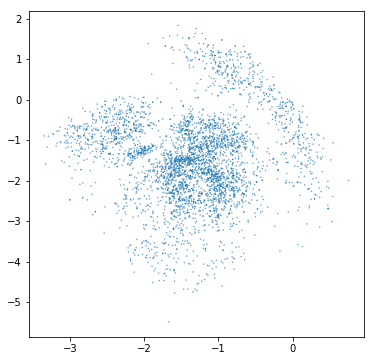

In [30]:
encoder = Model(x, z_mean)
# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(batch_1, batch_size=batch_size)
plt.figure(figsize=(6, 6))
s = [0.5 for n in range(len(x_test_encoded[:, 1]))]
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], marker='.',s=s)
#plt.colorbar()
plt.show()

In [23]:
print x_test.shape
x_xzw = encoder.predict(x_test, batch_size=100)
x_xzw

(10000, 784)


array([[-2.10433364,  2.37988424],
       [-0.19328663, -0.55626953],
       [ 1.6666646 ,  2.79757071],
       ..., 
       [-0.94538051,  1.07212234],
       [ 1.86915398, -0.10552728],
       [ 1.12747169, -1.12861872]], dtype=float32)

In [31]:
encoder = Model(x, z_mean)
encoder2 = Model(x2, z_mean2)
decoder_input = Input(shape=(4,))

test_1, test_2, test_3 = mnist.test.next_batch(4000)
#whl = Model(inputs=[x,x2,x_sum],outputs=[x_decoded_mean, x_decoded_mean2, decoded_mean_sum])
print(test_1.shape)
z = encoder.predict(test_1, batch_size=batch_size)
z1 = encoder2.predict(test_2, batch_size=batch_size)
print(z.shape)
print(z1.shape)
#decoder_input = concatenate([z, z1])
zz = np.hstack([z,z1])
print(zz.shape)
summ = decoder_h_sum(decoder_input)
sum_img = decoder_mean_sum(summ)
gen = Model(decoder_input,sum_img)
img = gen.predict(zz, batch_size=batch_size)
print(img.shape)
#rint(sum_img.shape)

(4000, 784)
(4000, 2)
(4000, 2)
(4000, 4)
(4000, 784)


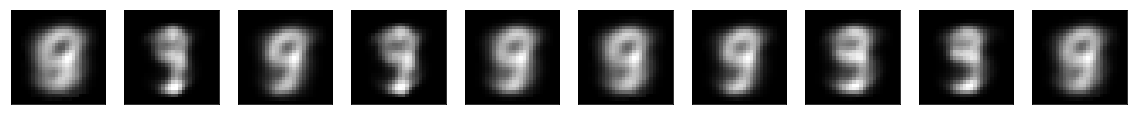

In [35]:
n = 10  # how many digits we will display
sam =3050
plt.figure(figsize=(20, 4))
for i in range(10):
    # display original
    ax = plt.subplot(1, n, i + 1)
    im1 = img[i+sam].reshape(1,28,28)
    plt.imshow(im1[0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.show()

In [12]:
# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

In [118]:
# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

NameError: name 'generator' is not defined